# SC1015-Mini-Project-NBA

HO SHANG JI JASON

GUPTA MANNAN MITHUN

ZOU XUEHAO

# Problem Definition
Which variables from the regular season have a relationship with whether the team becomes/is a NBA Champion?

Is there a change in a team's playstyle over the seasons?

Can we use Machine Learning techniques to predict NBA Champion using regular season data?

In [1]:
# Basic Libraries for use
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


# Data Cleaning and Preparations

First we import our data from a csv file

In [2]:
DATA = pd.read_csv('NBAdata.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
DATA.head()

,Rk,Team,Year,G,MP,W,L,WIN%,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Champion,Division,MVP
0,17.0,Atlanta Hawks*,2023,82,242.1,41.0,41.0,0.5,44.6,92.4,0.483,10.8,30.5,0.352,33.9,61.8,0.548,18.5,22.6,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4,NaN,Southeast Division,NaN
1,2.0,Boston Celtics*,2023,82,243.7,57.0,25.0,0.695121951,42.2,88.8,0.475,16.0,42.6,0.377,26.2,46.2,0.567,17.5,21.6,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,117.9,NaN,Atlantic Division,NaN
2,9.0,Brooklyn Nets*,2023,82,240.6,45.0,37.0,0.548780488,41.5,85.1,0.487,12.8,33.8,0.378,28.7,51.3,0.559,17.7,22.1,0.800,8.2,32.3,40.5,25.5,7.1,6.2,13.7,21.1,113.4,NaN,Atlantic Division,NaN
3,27.0,Charlotte Hornets,2023,82,241.8,27.0,55.0,0.329268293,41.3,90.4,0.457,10.7,32.5,0.330,30.5,57.9,0.528,17.6,23.6,0.749,11.0,33.5,44.5,25.1,7.7,5.2,14.2,20.3,111.0,NaN,Southeast Division,NaN
4,19.0,Chicago Bulls*,2023,82,242.7,40.0,42.0,0.487804878,42.5,86.8,0.490,10.4,28.9,0.361,32.1,57.9,0.555,17.6,21.8,0.809,8.5,33.9,42.4,24.5,7.9,4.5,13.4,18.9,113.1,NaN,Central Division,NaN


## Legend for variables
G - Games Played

MP - Minutes Played

W - Wins

L - Losses

WIN% - Win Percentage

FG - Field Goals Made

FGA - Field Goals Attempted

FG% - Field Goals Percentage

3P - 3 Pointers Made

3PA - 3 Pointers Attempted

3P% - 3 Pointers Percentage

2P - 2 Pointers Made

2PA - 2 Pointers Attempted

2P%	- 2 Pointers Percentage

FT - Free Throws Made

FTA	- Free Throws Attempted

FT%	- Free Throws Percentage

ORB	- Offensive Rebounds

DRB	- Defensive Rebounds

TRB	- Total Rebounds

AST	- Assists

STL	- Steals

BLK	- Blocks

TOV	- Turnovers

PF - Personal Fouls

PTS	- Points Scored

Champion - Is Champion or not

Divison - Division Team belongs in

MVP - Does the Team has the reigning MVP

To start off, we can observe that there are a number of NaN values in under the variable column of 'Champion' and 'MVP', hence in order to decide which value to replace NaN, we first need to know which value(s) there are in the column

In [3]:
print(DATA['Champion'].unique())
print(DATA['MVP'].unique())

[nan 'Yes']
[nan 'Yes']


From the above, we can see that there are currently only 2 categorical values in the column of 'Champion'. Yes and NaN. So to clean this column up, we will replace all NaN values with No.

In [4]:
DATA['Champion'] = DATA['Champion'].fillna('No')
DATA['MVP'] = DATA['MVP'].fillna('No')
print(DATA['Champion'].unique())
print(DATA['MVP'].unique())

['No' 'Yes']
['No' 'Yes']


We have succesfully fill in all NaN values in the data. Next we want to perform One-Hot Encoding, or in this case, Binary Encoding for the column of Champion and MVP. We will be replacing all the 'Yes' with 1s and all the 'No' with 0s. The main reasoning behind this is so that it can improve certain features for the later part on Machine Learning.

In [5]:
DATA['Champion'] = DATA['Champion'].replace({'Yes': 1, 'No': 0})
print(DATA['Champion'].unique())
DATA['MVP'] = DATA['MVP'].replace({'Yes':1,'No':0})
print(DATA['MVP'].unique())

[0 1]
[0 1]


Great, next we would like to drop some of columns(variables). Specifically speaking, we would like to drop, G(Games Played), W(Wins) and L(Losses).
The reasoning behind why is because we believe that the variable WIN%(Win Percentage) is a good/better representation of all the variables mentioned earlier combined.

Additionally, we would like to drop a few more variables, mainly, 3P (3-Pointer Made), 2P (2-Pointers Made), FG (Field Goals made) and FT (Free Throws Made). 
With similar reasoning, as their Percentage counter-part better represents them.

In [6]:
DATA.drop(columns=['G','W','L','3P','2P','FT','FG'], inplace=True)
DATA.head()

,Rk,Team,Year,MP,WIN%,FGA,FG%,3PA,3P%,2PA,2P%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Champion,Division,MVP
0,17.0,Atlanta Hawks*,2023,242.1,0.5,92.4,0.483,30.5,0.352,61.8,0.548,22.6,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4,0,Southeast Division,0
1,2.0,Boston Celtics*,2023,243.7,0.695121951,88.8,0.475,42.6,0.377,46.2,0.567,21.6,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,117.9,0,Atlantic Division,0
2,9.0,Brooklyn Nets*,2023,240.6,0.548780488,85.1,0.487,33.8,0.378,51.3,0.559,22.1,0.800,8.2,32.3,40.5,25.5,7.1,6.2,13.7,21.1,113.4,0,Atlantic Division,0
3,27.0,Charlotte Hornets,2023,241.8,0.329268293,90.4,0.457,32.5,0.330,57.9,0.528,23.6,0.749,11.0,33.5,44.5,25.1,7.7,5.2,14.2,20.3,111.0,0,Southeast Division,0
4,19.0,Chicago Bulls*,2023,242.7,0.487804878,86.8,0.490,28.9,0.361,57.9,0.555,21.8,0.809,8.5,33.9,42.4,24.5,7.9,4.5,13.4,18.9,113.1,0,Central Division,0


In [7]:
DATA['Rk'].unique()

array([17.,  2.,  9., 27., 19.,  5., 21.,  4., 30., 11., 28., 23., nan,
       12., 14.,  6., 13.,  1., 15., 16.,  8., 20., 25.,  3., 10., 26.,
        7., 29., 18., 22., 24.])

As you can see, there is a the NaN value for the categorical variable of Rk(Rank) and upon closer inspection of our data, the NaN rank associates with the row called "League Average", as seen below. We would like to remove that as it just the average stats of all teams in that season and contributes nothing to our project.

In [8]:
DATA['Team'].value_counts()

Team
League Average             11
Boston Celtics*            10
Sacramento Kings           10
Los Angeles Clippers*       9
Orlando Magic               9
Milwaukee Bucks*            9
Detroit Pistons             9
Golden State Warriors*      9
Toronto Raptors*            9
Minnesota Timberwolves      8
Oklahoma City Thunder*      8
New York Knicks             8
Miami Heat*                 8
Memphis Grizzlies*          8
Atlanta Hawks*              8
Portland Trail Blazers*     8
Houston Rockets*            8
Phoenix Suns                8
Charlotte Hornets           8
Brooklyn Nets*              8
Indiana Pacers*             7
San Antonio Spurs*          7
Los Angeles Lakers          7
New Orleans Pelicans        6
Utah Jazz*                  6
Cleveland Cavaliers         6
Washington Wizards          6
Dallas Mavericks*           6
Denver Nuggets*             6
Chicago Bulls*              6
Philadelphia 76ers*         6
Cleveland Cavaliers*        5
Washington Wizards*         5
Dalla

In [9]:
DATA = DATA[DATA['Team'] != 'League Average']
DATA['Team'].value_counts()

Team
Boston Celtics*            10
Sacramento Kings           10
Toronto Raptors*            9
Orlando Magic               9
Milwaukee Bucks*            9
Detroit Pistons             9
Golden State Warriors*      9
Los Angeles Clippers*       9
Atlanta Hawks*              8
Oklahoma City Thunder*      8
New York Knicks             8
Miami Heat*                 8
Memphis Grizzlies*          8
Minnesota Timberwolves      8
Portland Trail Blazers*     8
Houston Rockets*            8
Phoenix Suns                8
Charlotte Hornets           8
Brooklyn Nets*              8
Indiana Pacers*             7
San Antonio Spurs*          7
Los Angeles Lakers          7
New Orleans Pelicans        6
Utah Jazz*                  6
Cleveland Cavaliers         6
Washington Wizards          6
Dallas Mavericks*           6
Denver Nuggets*             6
Chicago Bulls*              6
Philadelphia 76ers*         6
Cleveland Cavaliers*        5
Washington Wizards*         5
Dallas Mavericks            5
Chica

We have removed all rows that are the League Average, and so, we also have removed all remaining NaN values in Rk as well. Next, we would like to better standardize all data, meaning we would to round up the WIN% to 3 Decimal Places. Also, we want to convert all values in Rk to integer, as they represent the Ranking of the team in that year. 

In [10]:
DATA['WIN%'] = DATA['WIN%'].astype(float)
DATA['WIN%'] = DATA['WIN%'].round(3)
DATA['Rk'] = DATA['Rk'].astype(int)
DATA.head()

,Rk,Team,Year,MP,WIN%,FGA,FG%,3PA,3P%,2PA,2P%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Champion,Division,MVP
0,17,Atlanta Hawks*,2023,242.1,0.500,92.4,0.483,30.5,0.352,61.8,0.548,22.6,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4,0,Southeast Division,0
1,2,Boston Celtics*,2023,243.7,0.695,88.8,0.475,42.6,0.377,46.2,0.567,21.6,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,117.9,0,Atlantic Division,0
2,9,Brooklyn Nets*,2023,240.6,0.549,85.1,0.487,33.8,0.378,51.3,0.559,22.1,0.800,8.2,32.3,40.5,25.5,7.1,6.2,13.7,21.1,113.4,0,Atlantic Division,0
3,27,Charlotte Hornets,2023,241.8,0.329,90.4,0.457,32.5,0.330,57.9,0.528,23.6,0.749,11.0,33.5,44.5,25.1,7.7,5.2,14.2,20.3,111.0,0,Southeast Division,0
4,19,Chicago Bulls*,2023,242.7,0.488,86.8,0.490,28.9,0.361,57.9,0.555,21.8,0.809,8.5,33.9,42.4,24.5,7.9,4.5,13.4,18.9,113.1,0,Central Division,0


Lastly, there are some teams with and * at the back of their names, indicating that for that season, they were in the PlayOffs. 
But we do not need that as obviously a Championship team would be in the PlayOffs! Hence we would remove the *. 
Additionally, in the earlier years there is a team called the 'Charlotte Bobcats' which later changed to the 'Charlotte Hornets'.
Hence to better standardize the data, we will change all 'Charlotte Bobcats' to 'Charlotte Hornets'.
All this applies to the New Orleans team(s) as well, see below for more.

In [11]:
DATA['Team'] = DATA['Team'].str.replace('*', '')
DATA['Team'] = DATA['Team'].str.replace('Charlotte Bobcats', 'Charlotte Hornets')
DATA['Team'] = DATA['Team'].str.replace('New Orleans Hornets', 'New Orleans Pelicans')
DATA['Team'].value_counts()

Team
Atlanta Hawks             11
Boston Celtics            11
Utah Jazz                 11
Toronto Raptors           11
San Antonio Spurs         11
Sacramento Kings          11
Portland Trail Blazers    11
Phoenix Suns              11
Philadelphia 76ers        11
Orlando Magic             11
Oklahoma City Thunder     11
New York Knicks           11
New Orleans Pelicans      11
Minnesota Timberwolves    11
Milwaukee Bucks           11
Miami Heat                11
Memphis Grizzlies         11
Los Angeles Lakers        11
Los Angeles Clippers      11
Indiana Pacers            11
Houston Rockets           11
Golden State Warriors     11
Detroit Pistons           11
Denver Nuggets            11
Dallas Mavericks          11
Cleveland Cavaliers       11
Chicago Bulls             11
Charlotte Hornets         11
Brooklyn Nets             11
Washington Wizards        11
Name: count, dtype: int64

### Prepared and Cleaned Data Set

In [12]:
DATA.head()

,Rk,Team,Year,MP,WIN%,FGA,FG%,3PA,3P%,2PA,2P%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Champion,Division,MVP
0,17,Atlanta Hawks,2023,242.1,0.500,92.4,0.483,30.5,0.352,61.8,0.548,22.6,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4,0,Southeast Division,0
1,2,Boston Celtics,2023,243.7,0.695,88.8,0.475,42.6,0.377,46.2,0.567,21.6,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,117.9,0,Atlantic Division,0
2,9,Brooklyn Nets,2023,240.6,0.549,85.1,0.487,33.8,0.378,51.3,0.559,22.1,0.800,8.2,32.3,40.5,25.5,7.1,6.2,13.7,21.1,113.4,0,Atlantic Division,0
3,27,Charlotte Hornets,2023,241.8,0.329,90.4,0.457,32.5,0.330,57.9,0.528,23.6,0.749,11.0,33.5,44.5,25.1,7.7,5.2,14.2,20.3,111.0,0,Southeast Division,0
4,19,Chicago Bulls,2023,242.7,0.488,86.8,0.490,28.9,0.361,57.9,0.555,21.8,0.809,8.5,33.9,42.4,24.5,7.9,4.5,13.4,18.9,113.1,0,Central Division,0


# Exploratory Data Analysis & Visualization

In [14]:
#New Library to use for EDA and Visualization
import plotly as pt
import scipy.stats as stats

Firstly, we want to know how many Champions to Non-Champions there are in our data. 
Also, we would like to look into which teams accross 2013-2023 have won the NBA Championship.

/Users/xuehao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Champion
0    319
1     11
Name: count, dtype: int64

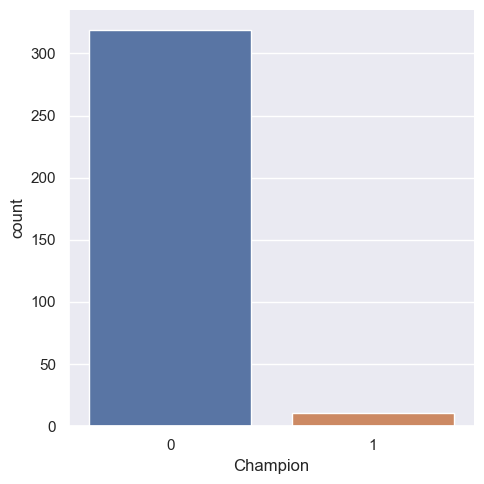

In [15]:
sb.catplot(x='Champion', kind='count', data=DATA)
DATA['Champion'].value_counts()

Here you can see there is a great imbalance, 319:11, of Champions to Non-Champions.
As a result, we need to be careful we the models we are using later on.

/Users/xuehao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


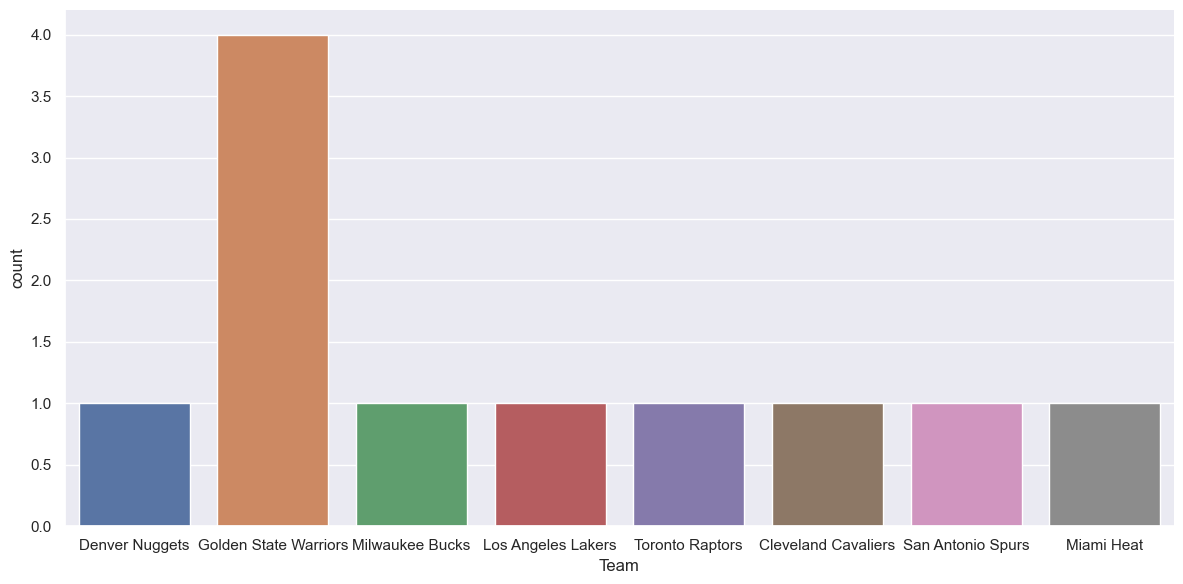

In [16]:
# Filter the DataFrame to include only rows where "Champion" equals 1
champions = DATA[DATA['Champion'] == 1]

# Create a count plot using catplot
sb.catplot(x='Team', kind='count', data=champions, height=6, aspect=2)


## Categorical (Champion) and Numeric variables

Next we want to see if there is a relationship between a Championship team and different numeric variables.
Because we are plotting numeric against categorical, we will first use a BoxPlot.

<Axes: xlabel='Champion', ylabel='PTS'>

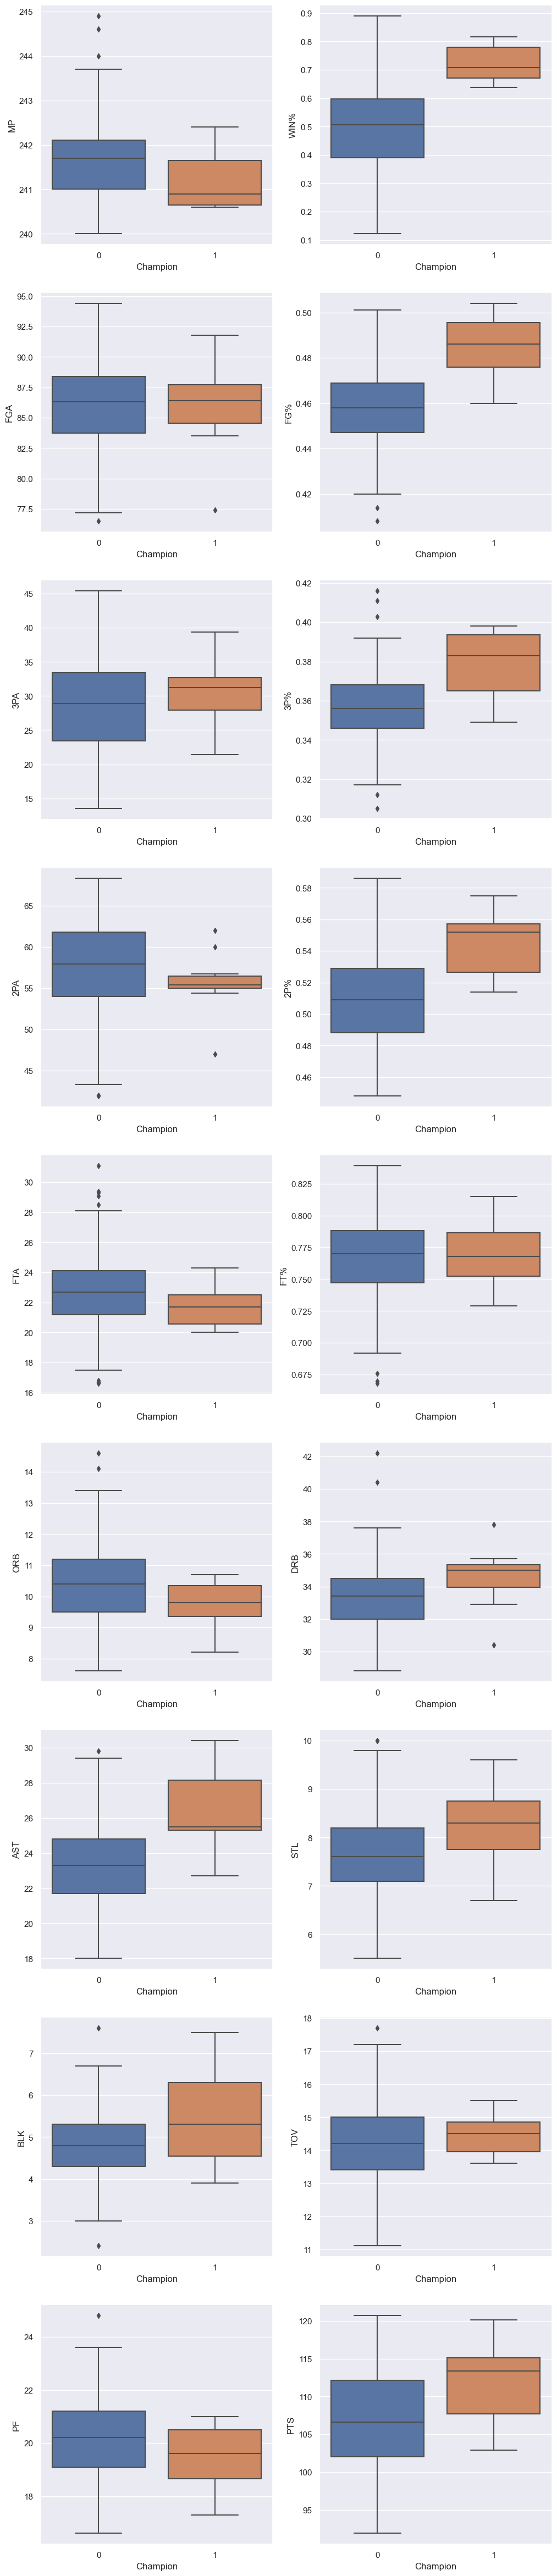

In [17]:
f, axes = plt.subplots(9, 2, figsize=(12, 60))
sb.boxplot(y="MP", x="Champion", data=DATA, ax=axes[0, 0])
sb.boxplot(y="WIN%", x="Champion", data=DATA, ax=axes[0, 1])
sb.boxplot(y="FGA", x="Champion", data=DATA, ax=axes[1, 0])
sb.boxplot(y="FG%", x="Champion", data=DATA, ax=axes[1, 1])
sb.boxplot(y="3PA", x="Champion", data=DATA, ax=axes[2, 0])
sb.boxplot(y="3P%", x="Champion", data=DATA, ax=axes[2, 1])
sb.boxplot(y="2PA", x="Champion", data=DATA, ax=axes[3, 0])
sb.boxplot(y="2P%", x="Champion", data=DATA, ax=axes[3, 1])
sb.boxplot(y="FTA", x="Champion", data=DATA, ax=axes[4, 0])
sb.boxplot(y="FT%", x="Champion", data=DATA, ax=axes[4, 1])
sb.boxplot(y="ORB", x="Champion", data=DATA, ax=axes[5, 0])
sb.boxplot(y="DRB", x="Champion", data=DATA, ax=axes[5, 1])
sb.boxplot(y="AST", x="Champion", data=DATA, ax=axes[6, 0])
sb.boxplot(y="STL", x="Champion", data=DATA, ax=axes[6, 1])
sb.boxplot(y="BLK", x="Champion", data=DATA, ax=axes[7, 0])
sb.boxplot(y="TOV", x="Champion", data=DATA, ax=axes[7, 1])
sb.boxplot(y="PF", x="Champion", data=DATA, ax=axes[8, 0])
sb.boxplot(y="PTS", x="Champion", data=DATA, ax=axes[8, 1])

### In general,

There are some clear cut relationship between the variable(s) and Champion.
For example this few variables are in general higher for Champions than Non-Champions:
WIN%,FG%,3P%,2P%,AST,BLK.

While the rest are either ambigious or probably no relationship.
However, there is a need for further testing, hence we will be using swarm plot and violin plot for the remaining variables to see, first glance, if there is a relationship between the 2.


/Users/xuehao/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/xuehao/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/xuehao/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/xuehao/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/xuehao/anaconda3/lib/python3.11/site-packages/seaborn/cat

<Axes: xlabel='PTS', ylabel='Champion'>

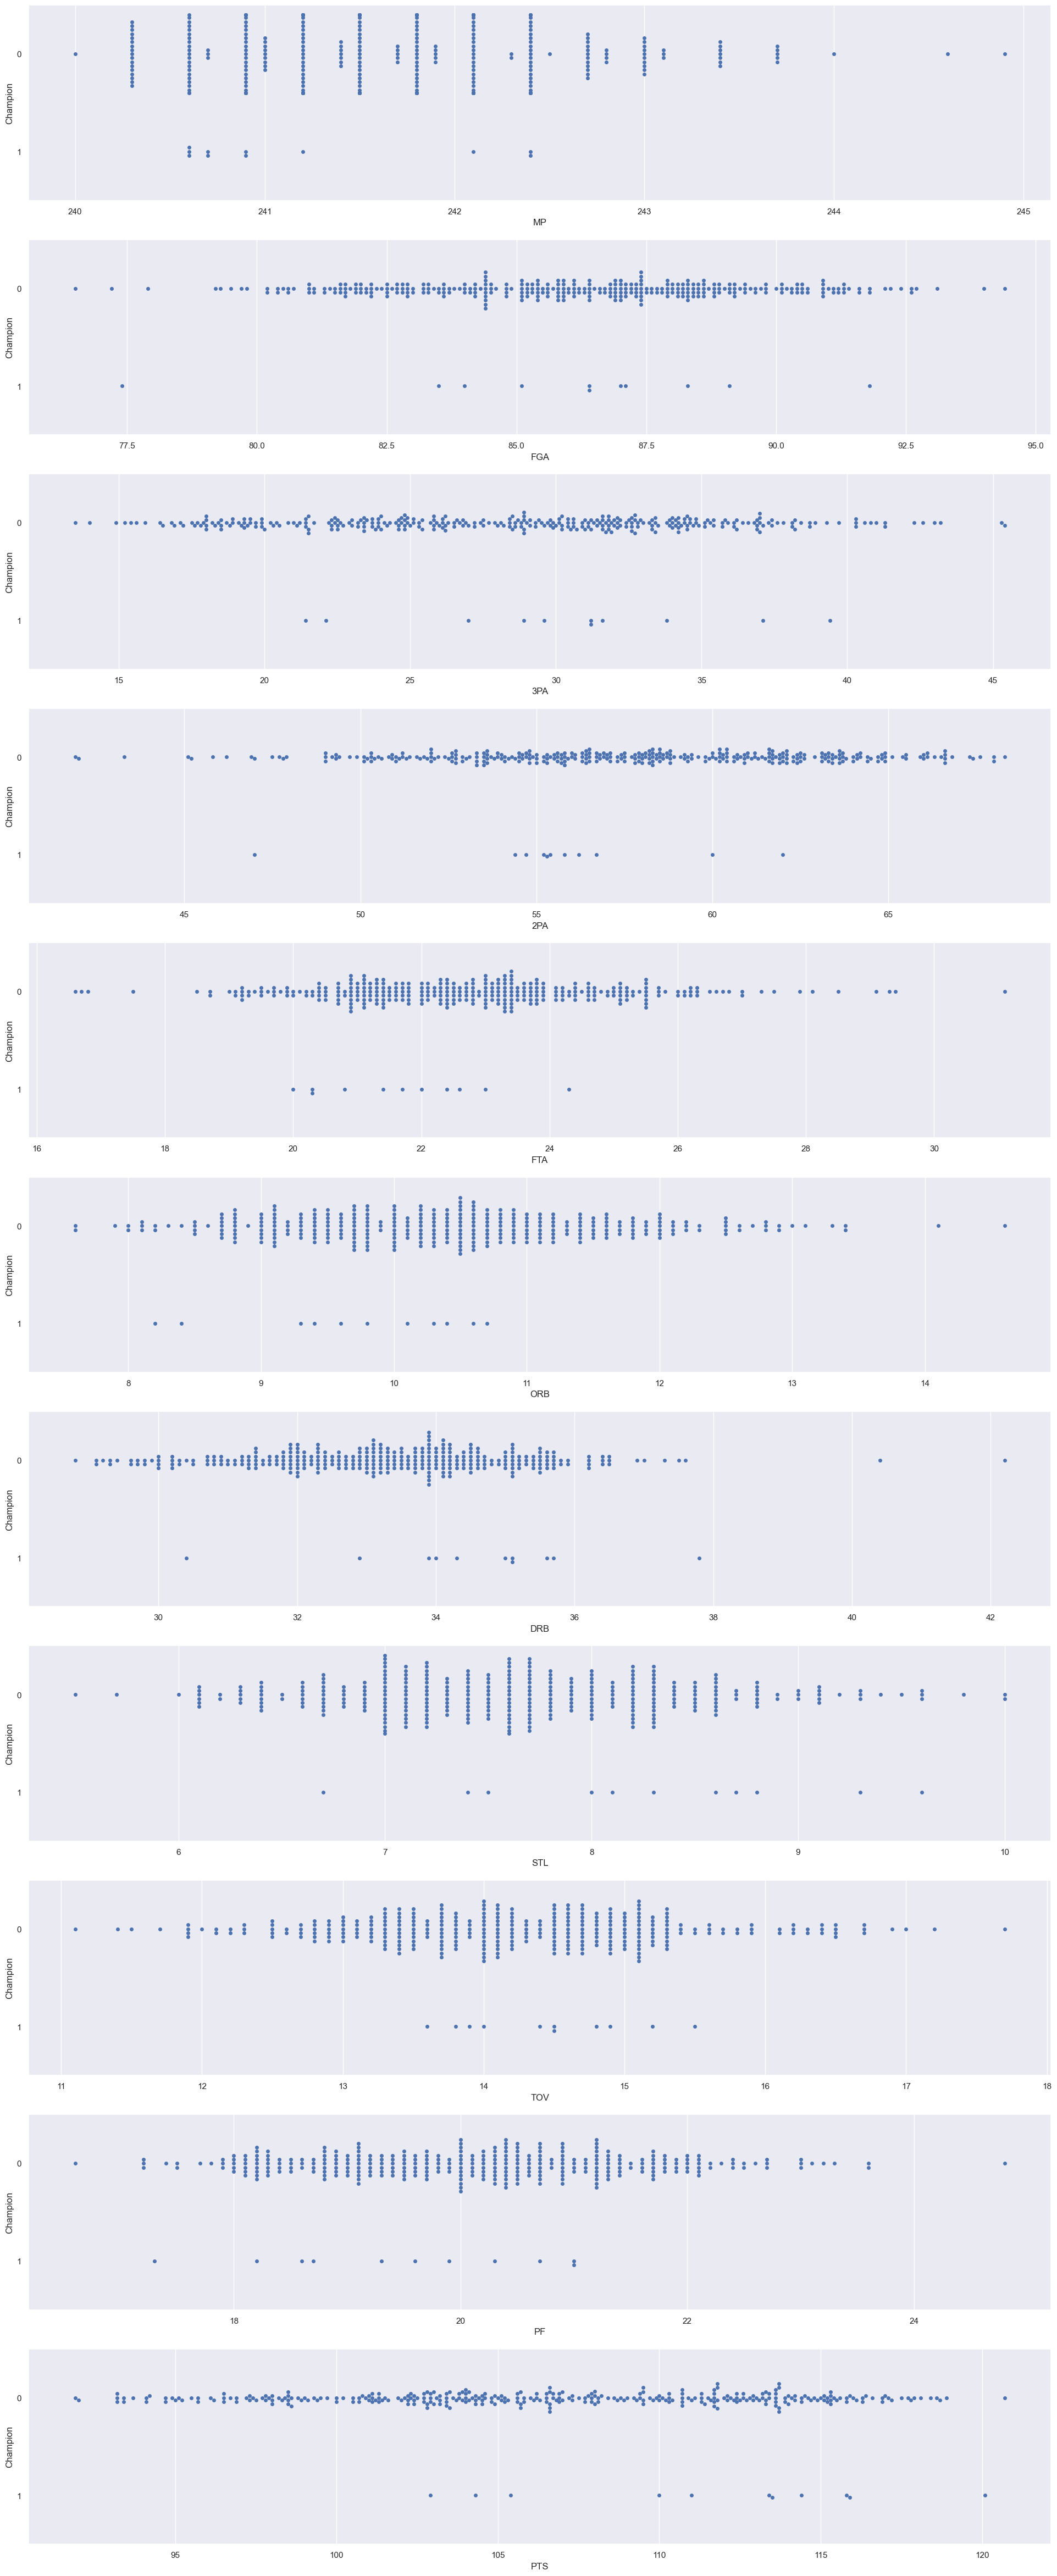

In [18]:
f, axes = plt.subplots(11 , figsize=(24, 60))
sb.swarmplot(x = "MP", y = "Champion", data = DATA, orient = "h",ax=axes[0])
sb.swarmplot(x = "FGA", y = "Champion", data = DATA, orient = "h",ax=axes[1])
sb.swarmplot(x = "3PA", y = "Champion", data = DATA, orient = "h",ax=axes[2])
sb.swarmplot(x = "2PA", y = "Champion", data = DATA, orient = "h",ax=axes[3])
sb.swarmplot(x = "FTA", y = "Champion", data = DATA, orient = "h",ax=axes[4])
sb.swarmplot(x = "ORB", y = "Champion", data = DATA, orient = "h",ax=axes[5])
sb.swarmplot(x = "DRB", y = "Champion", data = DATA, orient = "h",ax=axes[6])
sb.swarmplot(x = "STL", y = "Champion", data = DATA, orient = "h",ax=axes[7])
sb.swarmplot(x = "TOV", y = "Champion", data = DATA, orient = "h",ax=axes[8])
sb.swarmplot(x = "PF", y = "Champion", data = DATA, orient = "h",ax=axes[9])
sb.swarmplot(x = "PTS", y = "Champion", data = DATA, orient = "h",ax=axes[10])



<Axes: xlabel='PTS', ylabel='Champion'>

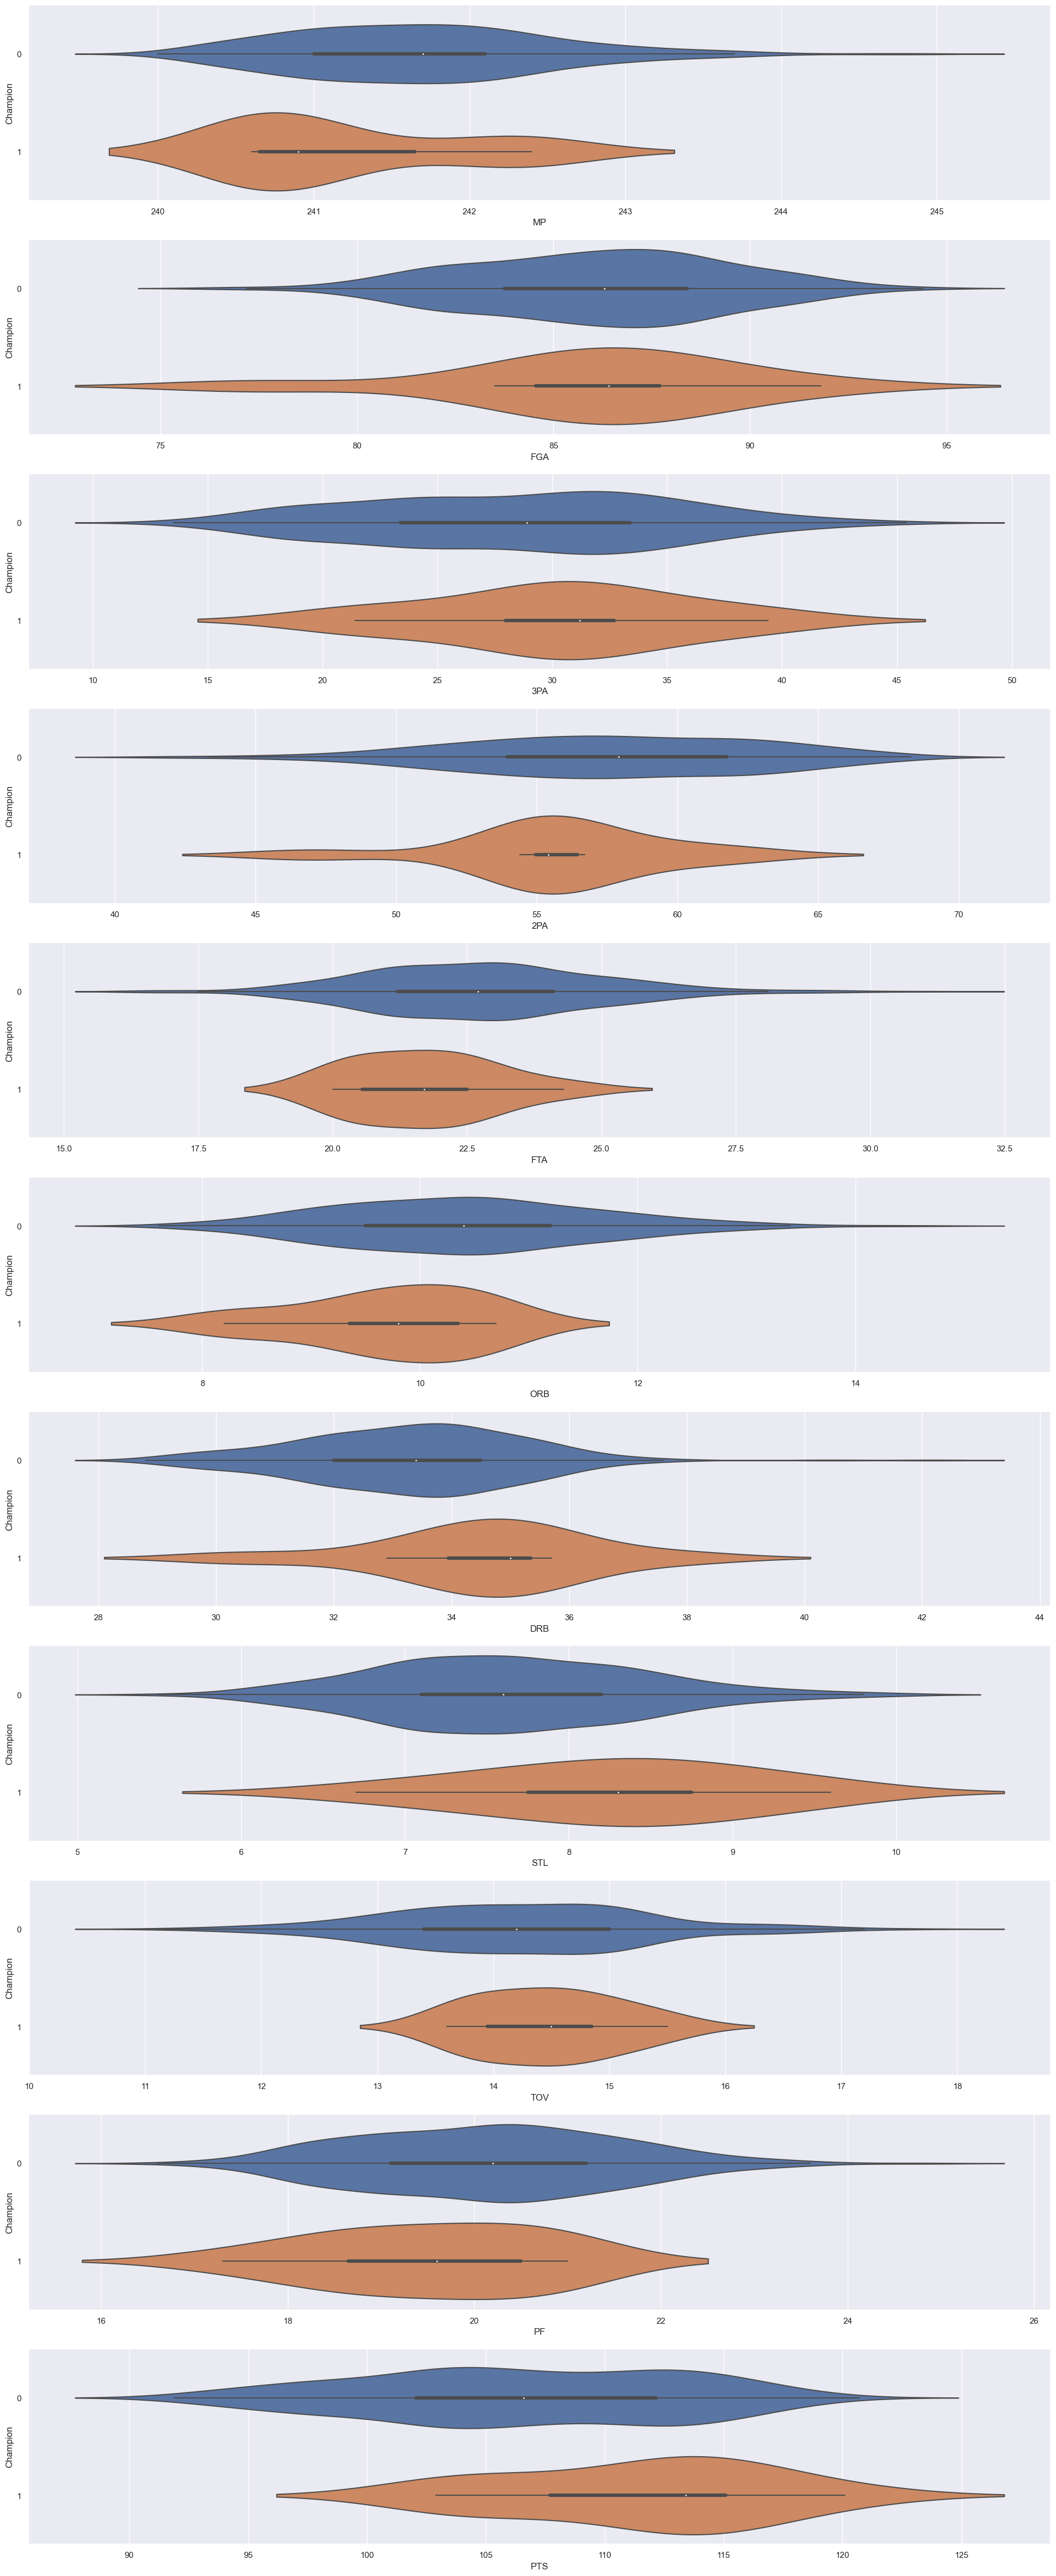

In [19]:
# Violin Plot
f, axes = plt.subplots(11 , figsize=(24, 60))
sb.violinplot(x = "MP", y = "Champion", data = DATA, orient = "h",ax=axes[0])
sb.violinplot(x = "FGA", y = "Champion", data = DATA, orient = "h",ax=axes[1])
sb.violinplot(x = "3PA", y = "Champion", data = DATA, orient = "h",ax=axes[2])
sb.violinplot(x = "2PA", y = "Champion", data = DATA, orient = "h",ax=axes[3])
sb.violinplot(x = "FTA", y = "Champion", data = DATA, orient = "h",ax=axes[4])
sb.violinplot(x = "ORB", y = "Champion", data = DATA, orient = "h",ax=axes[5])
sb.violinplot(x = "DRB", y = "Champion", data = DATA, orient = "h",ax=axes[6])
sb.violinplot(x = "STL", y = "Champion", data = DATA, orient = "h",ax=axes[7])
sb.violinplot(x = "TOV", y = "Champion", data = DATA, orient = "h",ax=axes[8])
sb.violinplot(x = "PF", y = "Champion", data = DATA, orient = "h",ax=axes[9])
sb.violinplot(x = "PTS", y = "Champion", data = DATA, orient = "h",ax=axes[10])

## In general,

we can see the distribution of the variables, hence we can tell that these few variables might have a relationship with being a Champion or not.

DRB - there is a higher concentration of championship teams having higher DRB than non-championship teams - Championship teams have higher DRB

MP - there is a higher concetration of championship teams having lower MP than non-championship teams - Championship teams have lower MP

STL - there is a higher concetration of championship teams having higher STL than non-championship teams - Championship teams have higher STL

PTS - there is a higher concetration of championship teams having higher PTS than non-championship teams - Championship teams have higher PTS

## Further Analysis
From the above, we decided to narrow our scope and believe that these few variables have a significant relationship with Champion:

WIN%,FG%,3P%,2P%,AST,BLK,DRB,MP,STL,PTS

To further confirm/verify the relationship between variables, and since the categorical variable in this case is either Champion 1 , or Non-Champion 0 , it is dichotomous, so we can use the Point-Biserial Correlation. 
Point-Biserial Correlation is great when finding the relationship between a categorical variable and a numeric variable. Especially so if the categorical variable in use is also binary/dischotomous. 

For Point-Biserial Correlation, -1 indicates a perfect negative association, +1 indicates a perfect positive association and 0 indicates no association.
Additionally, the P-value indicates whether our findings is statiscally significant or not.

In [20]:
# Calculate Point-Biserial Correlation coefficient for WIN%
point_biserial_corr, p_value = stats.pointbiserialr(DATA['Champion'], DATA['WIN%'])

print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.2844511573756988
P-value: 1.4667173630598758e-07


The Point-Biserial Correlation Coefficient is about 0.3 which mean there is a moderate positive correlation between WIN% and Champion.

The P-value is also very close to 0  and less than 0.05, meaning that the Point-Biserial Correlation Coefficient is statistically significant.

In [21]:
# Calculate Point-Biserial Correlation coefficient for FG%
point_biserial_corr, p_value = stats.pointbiserialr(DATA['Champion'], DATA['FG%'])

print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.2975178098004865
P-value: 3.60000425809278e-08


The Point-Biserial Correlation Coefficient is about 0.3 which mean there is a moderate positive correlation between FG% and Champion.

The P-value is also very close to 0 and less than 0.05, meaning that the Point-Biserial Correlation Coefficient is statistically significant.

In [22]:
# Calculate Point-Biserial Correlation coefficient for 3P%
point_biserial_corr, p_value = stats.pointbiserialr(DATA['Champion'], DATA['3P%'])

print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.24255112271987178
P-value: 8.344103047801263e-06


The Point-Biserial Correlation Coefficient is about 0.25 which mean there is a moderate positive correlation between 3P% and Champion.

The P-value is also very close to 0 and less than 0.05, meaning that the Point-Biserial Correlation Coefficient is statistically significant.

In [23]:
# Calculate Point-Biserial Correlation coefficient for 2P%
point_biserial_corr, p_value = stats.pointbiserialr(DATA['Champion'], DATA['2P%'])

print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.20848758876435716
P-value: 0.00013618318583216021


The Point-Biserial Correlation Coefficient is about 0.20 which mean there is a weak positive correlation between 2P% and Champion.

The P-value is also close to 0 and less than 0.05, meaning that the Point-Biserial Correlation Coefficient is statistically significant.

In [24]:
# Calculate Point-Biserial Correlation coefficient for AST
point_biserial_corr, p_value = stats.pointbiserialr(DATA['Champion'], DATA['AST'])

print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.24525456794364817
P-value: 6.562958156399377e-06


The Point-Biserial Correlation Coefficient is about 0.25 which mean there is a moderate positive correlation between AST and Champion.

The P-value is also very close to 0 and less than 0.05, meaning that the Point-Biserial Correlation Coefficient is statistically significant.

In [25]:
# Calculate Point-Biserial Correlation coefficient for BLK
point_biserial_corr, p_value = stats.pointbiserialr(DATA['Champion'], DATA['BLK'])

print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.15902532682286144
P-value: 0.0037755538236068495


The Point-Biserial Correlation Coefficient is about 0.15 which mean there is a quite weak positive correlation between BLK and Champion.

The P-value is also close to 0 and less than 0.05, meaning that the Point-Biserial Correlation Coefficient is statistically significant.

In [26]:
# Calculate Point-Biserial Correlation coefficient for DRB
point_biserial_corr, p_value = stats.pointbiserialr(DATA['Champion'], DATA['DRB'])

print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.11511276759747624
P-value: 0.036604748529133875


The Point-Biserial Correlation Coefficient is about 0.11 which mean there is a very weak positive correlation between DRB and Champion.

The P-value is also less than 0.05, meaning that the Point-Biserial Correlation Coefficient is statistically significant.

In [27]:
# Calculate Point-Biserial Correlation coefficient for MP
point_biserial_corr, p_value = stats.pointbiserialr(DATA['Champion'], DATA['MP'])

print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: -0.1066698259972666
P-value: 0.05287657234327736


The Point-Biserial Correlation Coefficient is about -0.10 which mean there is a very weak positive correlation between MP and Champion.

The P-value is also about 0.05, meaning that the Point-Biserial Correlation Coefficient may need to be further investigated and the relationship between the 2 variables might not be concrete.

In [28]:
# Calculate Point-Biserial Correlation coefficient for STL
point_biserial_corr, p_value = stats.pointbiserialr(DATA['Champion'], DATA['STL'])

print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.13847059216399818
P-value: 0.011800993255253286


The Point-Biserial Correlation Coefficient is about 0.13 which mean there is a weak positive correlation between STL and Champion.

The P-value is also less than 0.05, meaning that the Point-Biserial Correlation Coefficient is statistically significant.

In [29]:
# Calculate Point-Biserial Correlation coefficient for PTS
point_biserial_corr, p_value = stats.pointbiserialr(DATA['Champion'], DATA['PTS'])

print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.1343124889176852
P-value: 0.014617369744522745


The Point-Biserial Correlation Coefficient is about 0.13 which mean there is a weak positive correlation between PTS and Champion.

The P-value is also less than 0.05, meaning that the Point-Biserial Correlation Coefficient is statistically significant.

## Overall,

I believe that FG% have the strongest relation ship with Champion. While the other variables have varying relationship with Champion, from analysing the results, MP has the weakest and the relationship needs to be further investigated with a larger data size due to its P-value.

Concluding, we believe that the variables FG%,WIN%,3P%,2P%,AST,BLK,STL,DRB, of varying effectiveness, are useful when trying to determine a team is a Champion or not.

### Data Driven Insights & Recommendations
From observing the box-plots, swarm & violin plots and using deeper analysis using Point-Biserial Correlation, we have come to some insights below:

From observing the relevant box-plots, in general champions have higher 3P%, meaning, the higher the team's 3P%, the better odds we have of being/is a NBA Champion. 
What we would recommend NBA teams is to get better/efficient 3-point shooters that will result in a increase of the team's 3P%.

From observing the relevant box-plots, in general champions have higher 2P%, meaning, the higher the team's 2P%, the better odds we have of being/is a NBA Champion. 
But since 2-points can be obtained shooting the mid-range or attack the rim, we come to realise that attacking the rim will result in a higher 2P% compared to shooting the mid-range. What this means is that we would recommend NBA teams to get players that are good rim attackers.

From observing the relevant box-plots, in general champions have higher FG%, meaning, the higher the team's FG%, the better odds we have of being/is a NBA Champion. 
But since FG% is tied very closely to 3P% and 2P%, what we recommend is the same as above.

From observing the relevant box-plots, in general champions have higher WIN%, meaning, the higher the team's WIN%, the better odds we have of being/is a NBA Champion. 
What we can recommend is getting players that have a higher regular WIN%, as it would probably increase the WIN% of the team, and so improve the odds of being Champion.

From observing the relevant box-plots, in general champions have higher AST, meaning, the higher the team's AST, the better odds we have of being/is a NBA Champion. 
What we recommend NBA teams is that they can get more team-orientated players, that are more willing to pass, than some ISO-centric players, as this will definitely improve the team's overall AST, so improving their odds of winning the NBA Championship

From observing the relevant box-plots, in general champions have higher BLK, meaning, the higher the team's BLK, the better odds we have of being/is a NBA Champion. 
We recommend teams to get players that are tall, and also able to protect the rim well. As usually most BLKs comes from rim attacks, having tall players can help BLK more shoots, BLK increases for teams, odds of being champions increases.

From the relevant swarm and violin plots, in general championship teams have higher STL and DRB. What that means is that the higher the team's STL or DRB, the better odds they are of being a NBA Champion.
What we can recommend may sound contradictory, but having tall players that can collect more DRB can increase the team's DRB, but having faster, usually shorter players, can also help increase the team's STL as well. In this case, we look into the Point-Biserial Correlation Coefficient for both stats. It looks like STL slightly edges out DRB, however, if we were to also consider other factors like BLK, it could mean that taller players are still a bit more valuable than shorter players. So overall, what we can recommend is probably get 1 or 2 more taller players than shorter players for a NBA line-up.

Additional thing to note for the above is that, instead of focusing too much on the height of the players, maybe we can look into their wingspans, as the longer the wingspans of a player, said player could have not only higher STLs, but BLKs and DRBs as well. (An example of a shorter/average height player having extreme high Rebounds(DRB+ORB) per game is Dennis Rodman, who had a ridiculous wingspan of 220cm)

## Categorical (Champion) and Categorical variables

Here, we will try to find if a relationship exists between the categorical variable Champion and different categorical variables.

We have 3 categorical variables to use:

Rk, which is the ranking of the team during the regular season

Division, which is which division the team belongs to

MVP, which is whether the current MVP is on the team or not



### RK

<Axes: xlabel='Rk'>

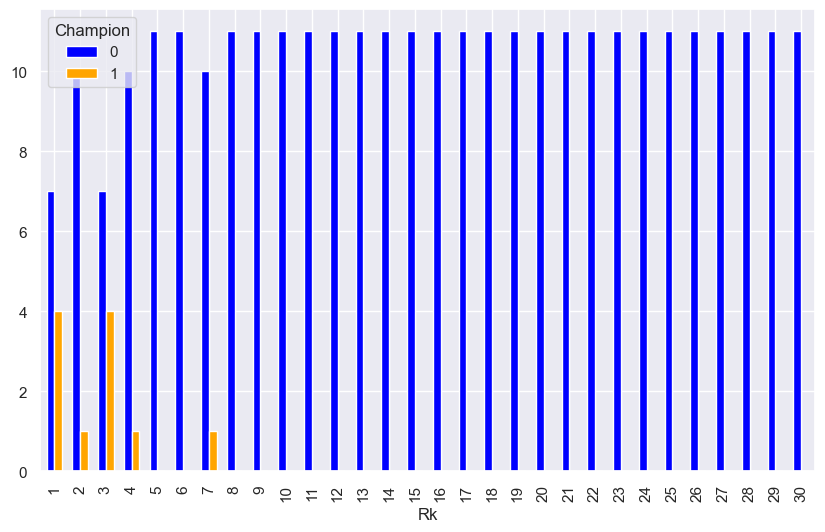

In [30]:
# Analysing RK

# Visualizing Rk and Champion
# Group by Rk and Champion to count occurrences
group = DATA.groupby(['Rk', 'Champion']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))  
group.plot(kind='bar', ax=ax, color=['blue', 'orange'], width=0.6)  

We can see from the paired plot above that most of Champions have low ranks, or better ranking, mostly 3 and below. This might show a relationship between Rk and Champion, meaning the lower the Rk, the higher the chance of becoming a champion. But, further analysis is still needed.

To further analyse, we decided to use Chi-square Test for Independence and to eventually calculate Cramér's V to check the correlation between the 2 variables. As Cramér's V is measure of association that's specifically designed for use with categorical variables, providing a standardized measure of the strength of association.

Cramér's V ranges from 0 - 1, where a value closer to 0 means weak/no relationship and a value closer to 1 means stronger relationship.

In [31]:
#Making the table
table = pd.crosstab(DATA['Rk'], DATA['Champion'])

In [32]:
#V = √(X2/N) / min(C-1, R-1)
#X2: It is the Chi-square statistic
#N: It represents the total sample size
#R: It is equal to the number of rows
#C: It is equal to the number of columns

X2 = stats.chi2_contingency(table)[0] 
N = np.sum(table).sum()
minimum_dimension = min(table.shape)-1
  
# Calculate Cramer's V 
V = np.sqrt((X2/(N*minimum_dimension)))
  
# Print the result 
print(V) 

0.5145364820822323


With Cramér's V being about 0.51, it shows that there is a moderately strong association between Rk and Champion, and following-up from the above, in general the lower the Rk the higher odd of being Champion

### Division

<Axes: xlabel='Division'>

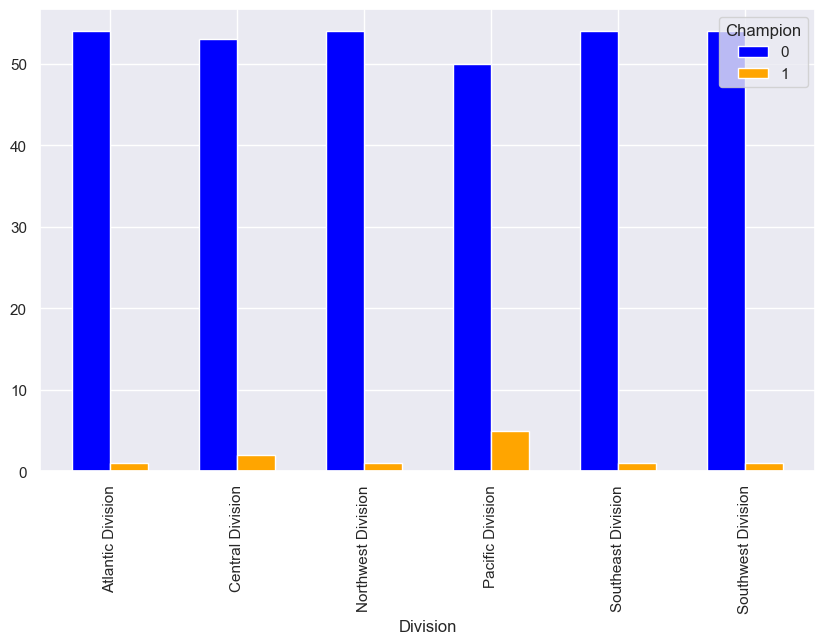

In [33]:
# Analysing Division

# Visualizing Division and Champion
# Group by Division and Champion to count occurrences
group = DATA.groupby(['Division', 'Champion']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))  
group.plot(kind='bar', ax=ax, color=['blue', 'orange'], width=0.6) 

From the above, it seems like teams from the Pacific Division may have better odds of being Champions and followed by the Central Division? But we obviously need further analysis of the relationship between Division and Champion

In [34]:
#Making the table
table = pd.crosstab(DATA['Division'], DATA['Champion'])

#V = √(X2/N) / min(C-1, R-1)
#X2: It is the Chi-square statistic
#N: It represents the total sample size
#R: It is equal to the number of rows
#C: It is equal to the number of columns

X2 = stats.chi2_contingency(table)[0] 
N = np.sum(table).sum()
minimum_dimension = min(table.shape)-1
  
# Calculate Cramer's V 
V = np.sqrt((X2/(N*minimum_dimension)))
  
# Print the result 
print("Cramér's V: ")
print(V) 
print("P-value: ")
print(stats.chi2_contingency(table)[1])

Cramér's V: 
0.14813363449166975
P-value: 
0.20329863908011306


From the above we can see the Cramér's V is around 0.15, which will mean a weak association between Division and Champion, but, as you can see the P-value is way above 0.05, indicating that there is no statistically significant association between the Division and Champion variables.

### MVP

<Axes: xlabel='Champion', ylabel='MVP'>

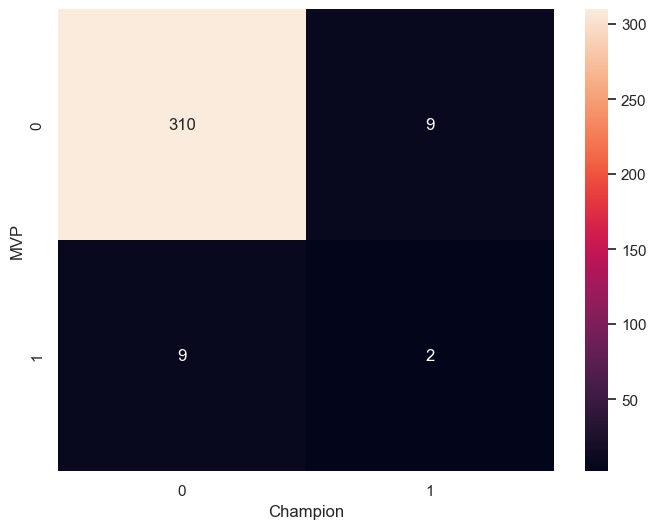

In [35]:
# Analysing MVP

# Visualizing MP and Champion
# Create a contingency table
table = pd.crosstab(DATA['MVP'], DATA['Champion'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(table, annot=True, fmt = "d")

From the above we can see that, Majority of teams that do not have the MVP also do not become the NBA Champion. 
Rate of being Champion (Have NO MVP) = 9/(310+9) = 0.0282, which shows a LOW rate of being the NBA champions if the team do not have the reigning MVP.

However, we also can see that the teams with MVP, also do not have the best rates of being Champions.
Rate of being Champion (Have MVP) = 2/(9+2) = 0.1818, although not great, it is still way higher than the rate of being champion without the MVP. 

This might show that having the MVP on the team is important to winning the Championship.


But, as per usual we need further analysis.

For further analysis we will find the Phi coefficient. Phi coefficient is optimal for 2 binary variables, which are what we are using currently, and similar to Cramér's V but for 2x2 contingency tables. The Phi coefficient ranges from -1 to 1, where 0 represents no relationship and 1/-1 meaning strong relationship.

In [36]:
#Obtain the values in each box
b00 = table.iloc[0, 0]
b01 = table.iloc[0, 1]
b10 = table.iloc[1, 0]
b11 = table.iloc[1, 1]

nume = (b11 * b00) - (b01 * b10)
deno = np.sqrt((b11 + b10) * (b00 + b01) * (b10 + b00) * (b01 + b11))
phi = nume / deno
print("Phi Coefficient: ")
print(phi)

Phi Coefficient: 
0.1536050156739812


A Phi Coefficient of 0.154 suggests a weak positive association between the 2 variables.

A positive value indicates that when one variable, MVP, is true, the other variable, Champion, is also more likely to be true, and vice versa.

## Overall,
From the above analysis, we can safely conclude that the variable Rk arguably has the strongest relationship with Champion compared to the other 2 variables. While on the other hand, the variable Division most likely have no statistically significant association between itself and the Champion variable. 

Concluding, we believe the variables Rk and MVP are useful variables to determine whether a team is a Champion or not.

### Data Driven Insights & Recommendations

From obsering the relevant paired column plot and Cramer's V, the lower the Rk, the better odds of being Champion.
What we can recommend is to try to recruit players from previous season higher ranking teams, it might be able to improve the Rk of the current team(lower the Rk), and so increases the odds of being Champion.

From observing the heatmap and Phi coefficient, we come to realise that teams with the MVP have a higher rate of becoming/being the NBA champion. 
What we then recommend is that teams in the NBA to trade for players that have a high chance of being the MVP, this could be looking at individual metrics or even looking at previous years MVP, as it might increase the rate of becoming the NBA champion that season.

## Lastly, 
we would like to see if there is a trend of playstyle for NBA teams accros the year. Meaning that we would like to see if NBA teams have shifted more defensively, example more steals, blocks, or perhaps more team orientated, example more assists, or otherwise. 

As we believe that teams, with professional analysts, would guide the team in the direction that would improve their chance of winning the NBA championship. 

If we can find a variable that satisfy the above, we can say with confidence, to a certain extent, that this variable may be useful in determining whether a team is or will become an NBA champion or not.

You might have notice but factors like 3PA,2PA,FTA AND FGA are variables with poor/no relationship with Champion.
This variables, and more, are great to see overtime how teams have changed their playstyles. Below are some time-series for us to analyse further.

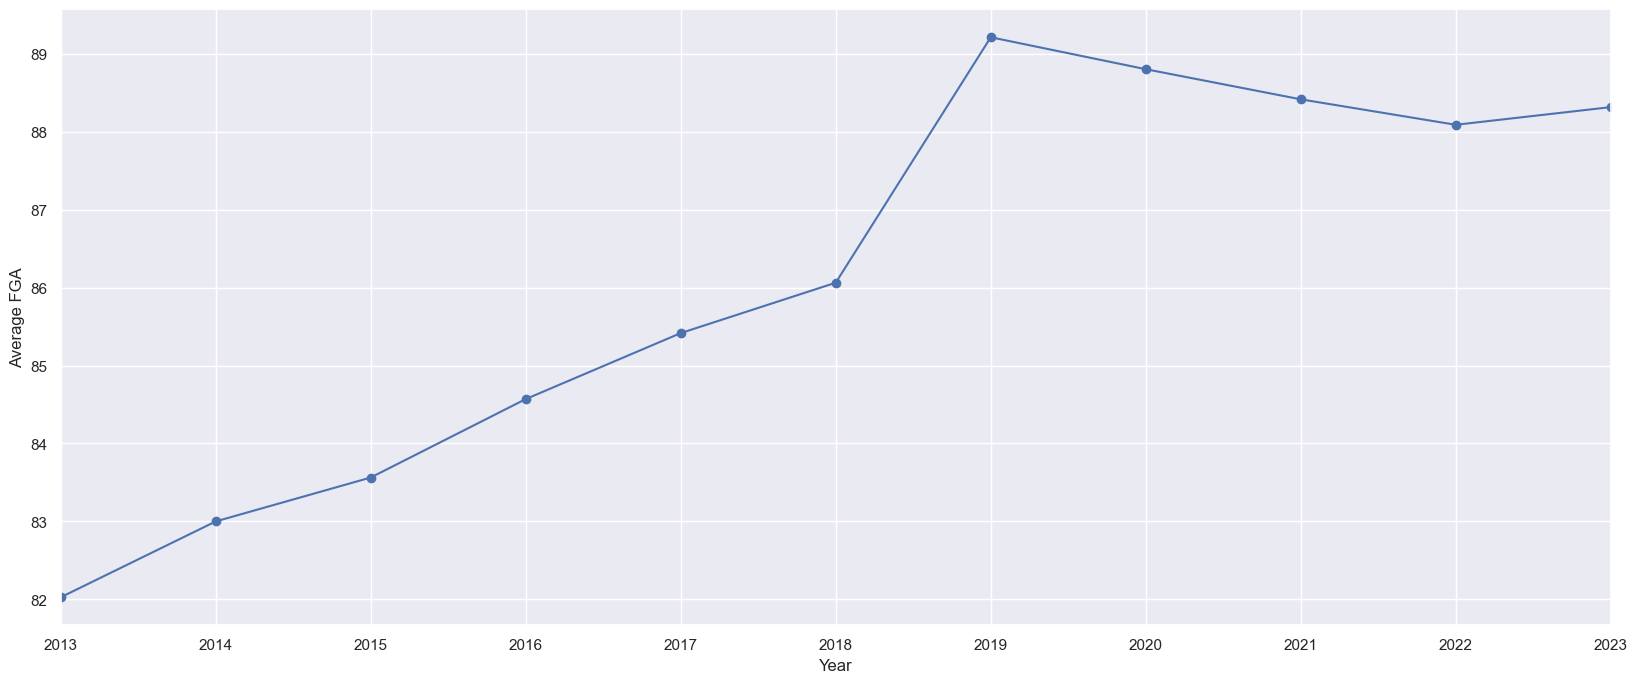

In [37]:
# Time-Series for FGA


DATA['Year'] = pd.to_datetime(DATA['Year'], format='%Y')

# Group by 'Year' and calculate the average FGA
avgFGA = DATA.groupby('Year')['FGA'].mean()

# Plot the time series
plt.figure(figsize=(20, 8))
avgFGA.plot(marker='o', linestyle='-')
plt.ylabel('Average FGA')


#This is just to include the first and last year as there was some error before
years = range(2013, 2024)  
plt.xticks(avgFGA.index, years)
print()

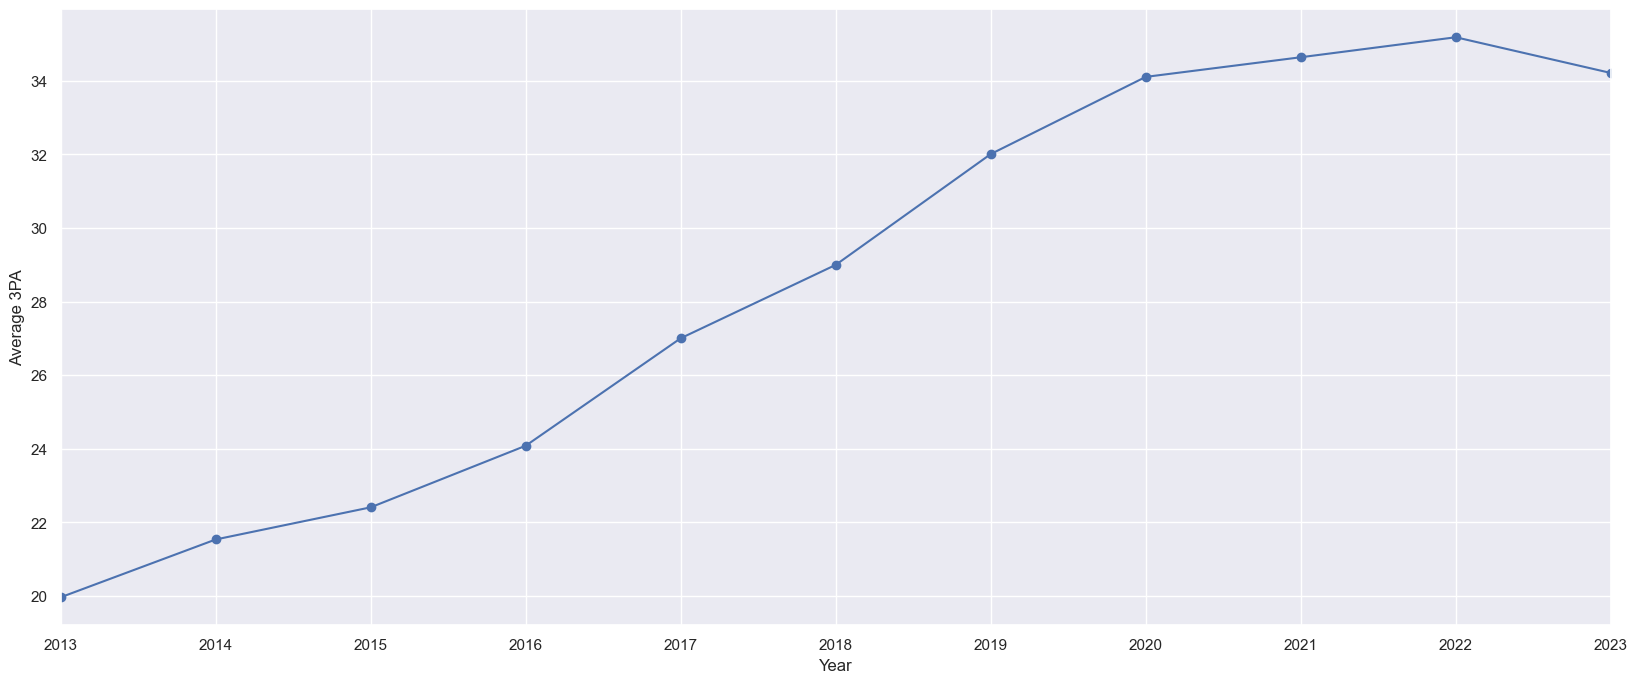

In [38]:
# Time-Series for 3PA


# Group by 'Year' and calculate the average 3PA
avg = DATA.groupby('Year')['3PA'].mean()

# Plot the time series
plt.figure(figsize=(20, 8))
avg.plot(marker='o', linestyle='-')
plt.ylabel('Average 3PA')


#This is just to include the first and last year as there was some error before
years = range(2013, 2024)  
plt.xticks(avg.index, years)
print()

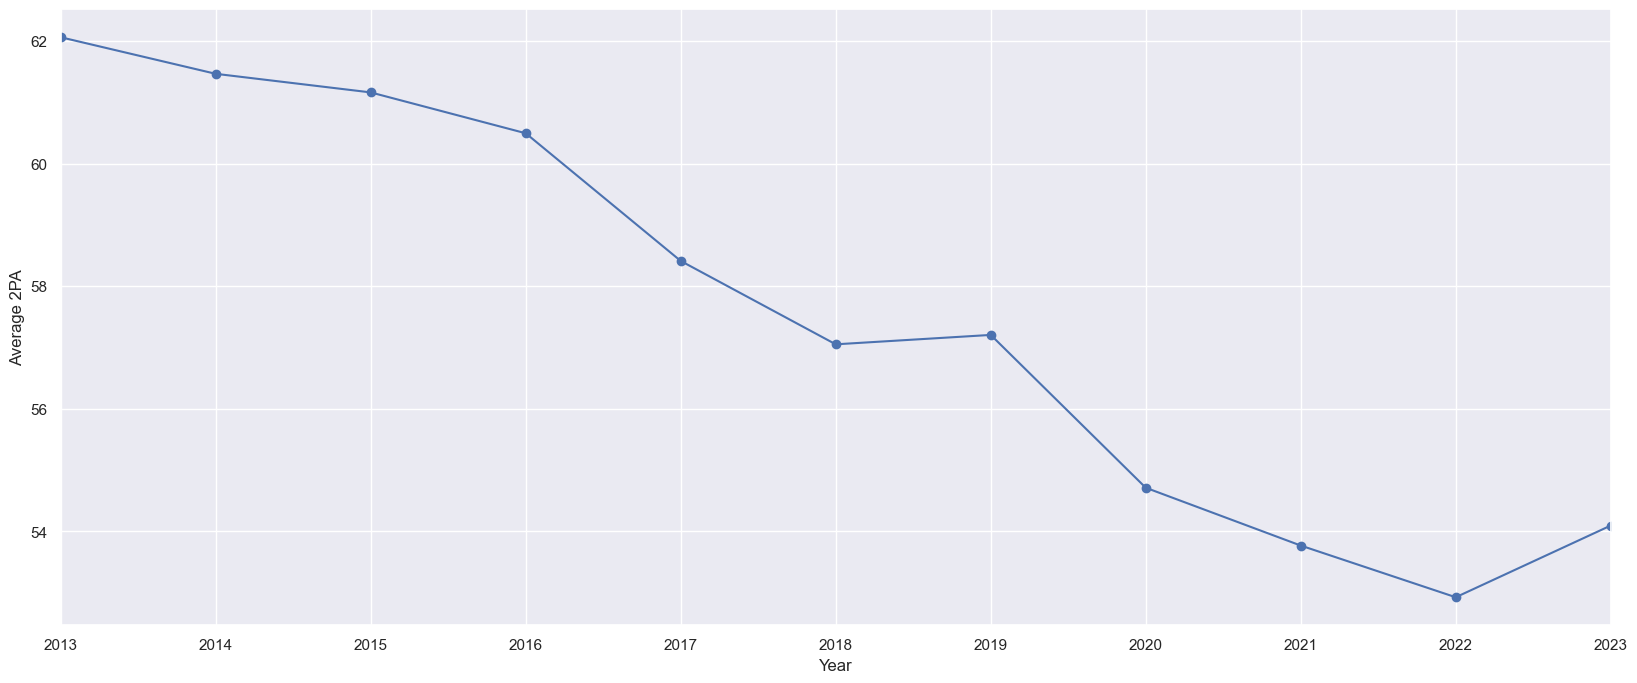

In [39]:
# Time-Series for 2PA


# Group by 'Year' and calculate the average 2PA
avg = DATA.groupby('Year')['2PA'].mean()

# Plot the time series
plt.figure(figsize=(20, 8))
avg.plot(marker='o', linestyle='-')
plt.ylabel('Average 2PA')


#This is just to include the first and last year as there was some error before
years = range(2013, 2024)  
plt.xticks(avg.index, years)
print()

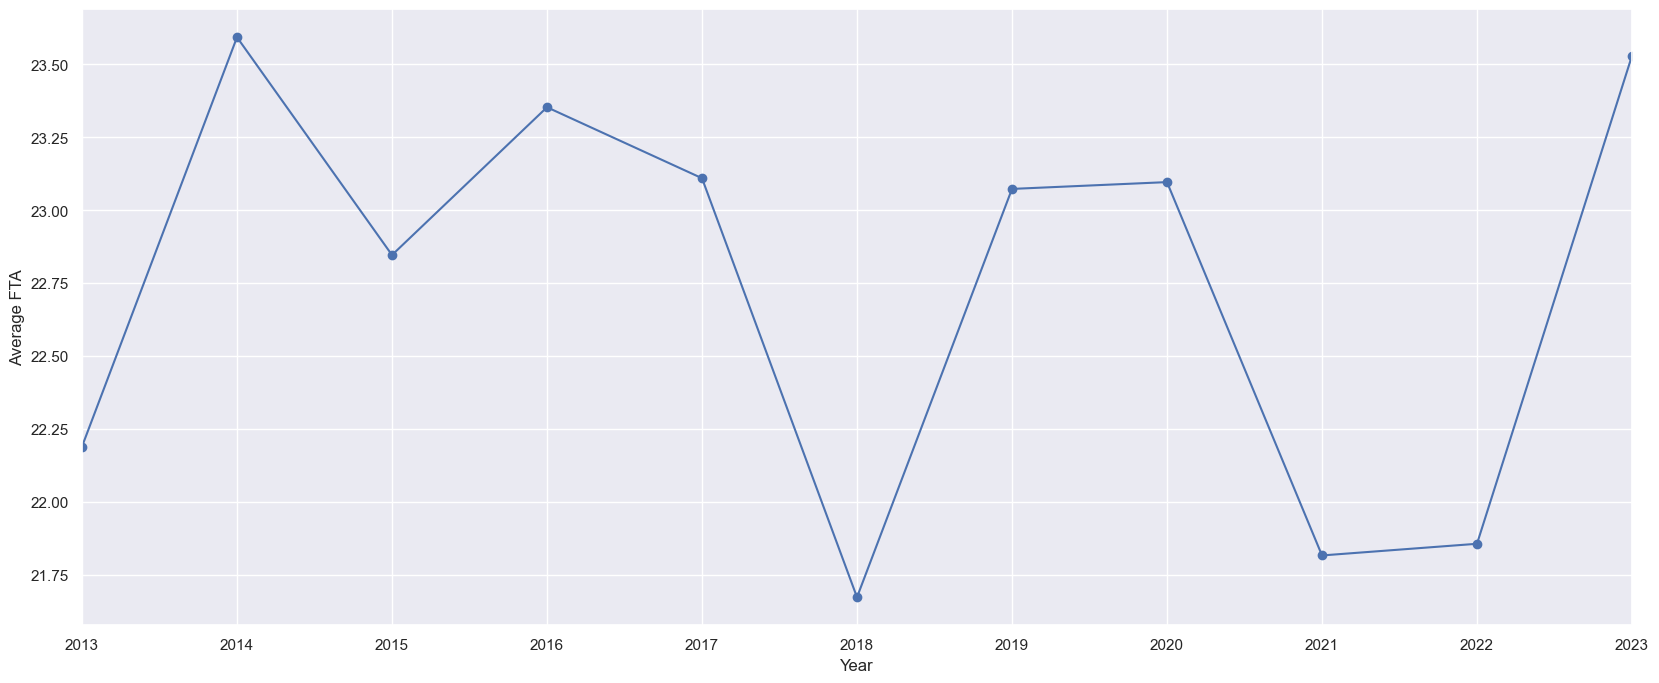

In [40]:
# Time-Series for FTA


# Group by 'Year' and calculate the average FTA
avg = DATA.groupby('Year')['FTA'].mean()

# Plot the time series
plt.figure(figsize=(20, 8))
avg.plot(marker='o', linestyle='-')
plt.ylabel('Average FTA')


#This is just to include the first and last year as there was some error before
years = range(2013, 2024)  
plt.xticks(avg.index, years)
print()

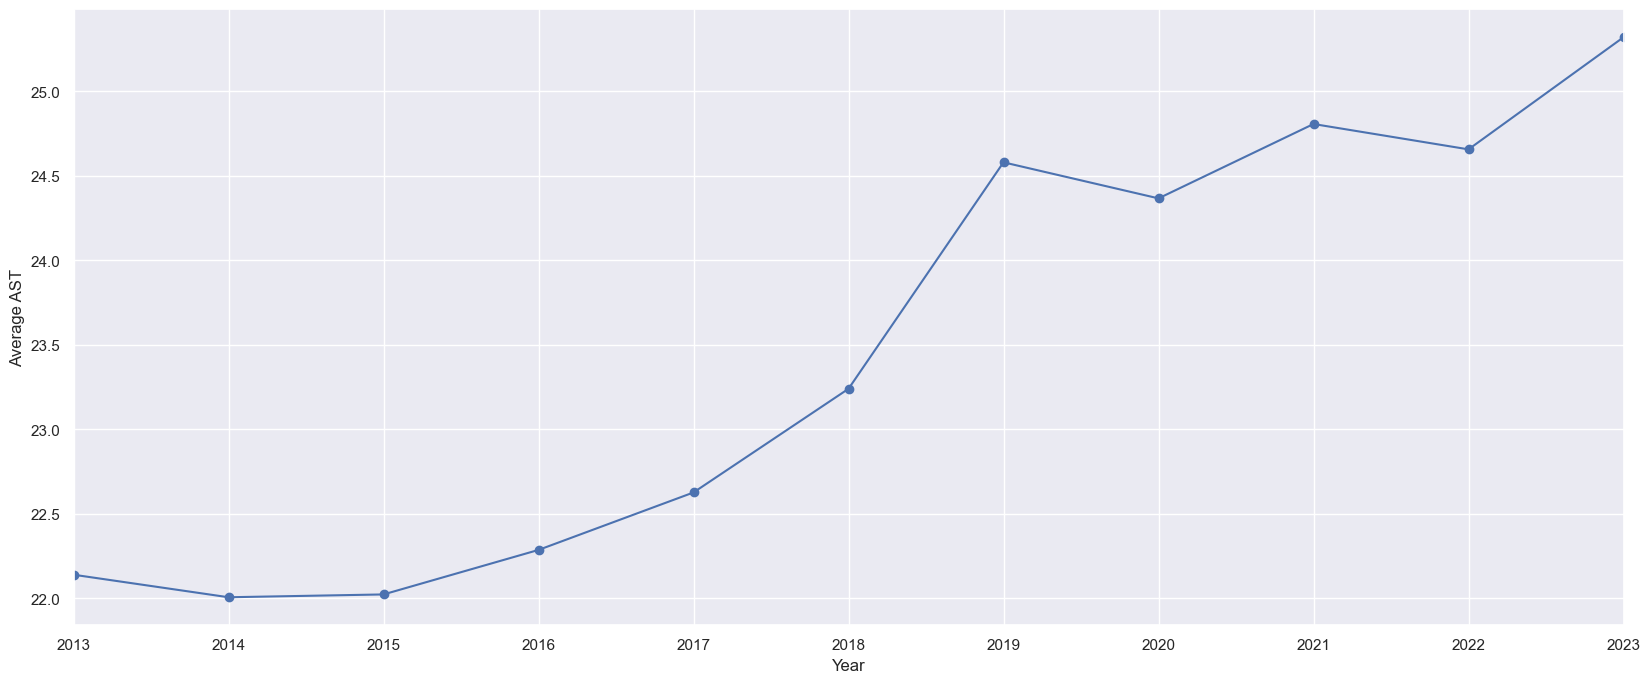

In [41]:
# Time-Series for AST


# Group by 'Year' and calculate the average AST
avg = DATA.groupby('Year')['AST'].mean()

# Plot the time series
plt.figure(figsize=(20, 8))
avg.plot(marker='o', linestyle='-')
plt.ylabel('Average AST')


#This is just to include the first and last year as there was some error before
years = range(2013, 2024)  
plt.xticks(avg.index, years)
print()

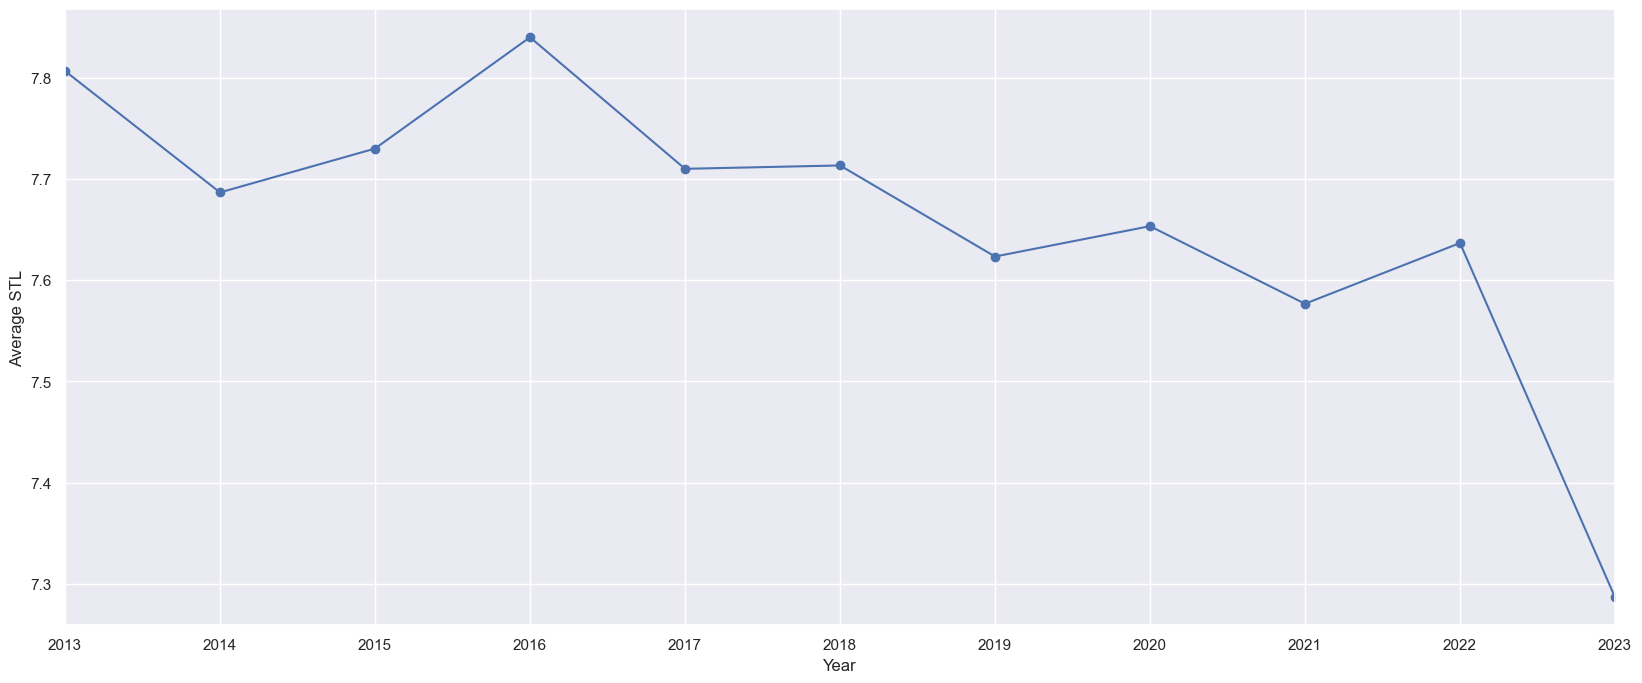

In [42]:
# Time-Series for STL


# Group by 'Year' and calculate the average STL
avg = DATA.groupby('Year')['STL'].mean()

# Plot the time series
plt.figure(figsize=(20, 8))
avg.plot(marker='o', linestyle='-')
plt.ylabel('Average STL')


#This is just to include the first and last year as there was some error before
years = range(2013, 2024)  
plt.xticks(avg.index, years)
print()

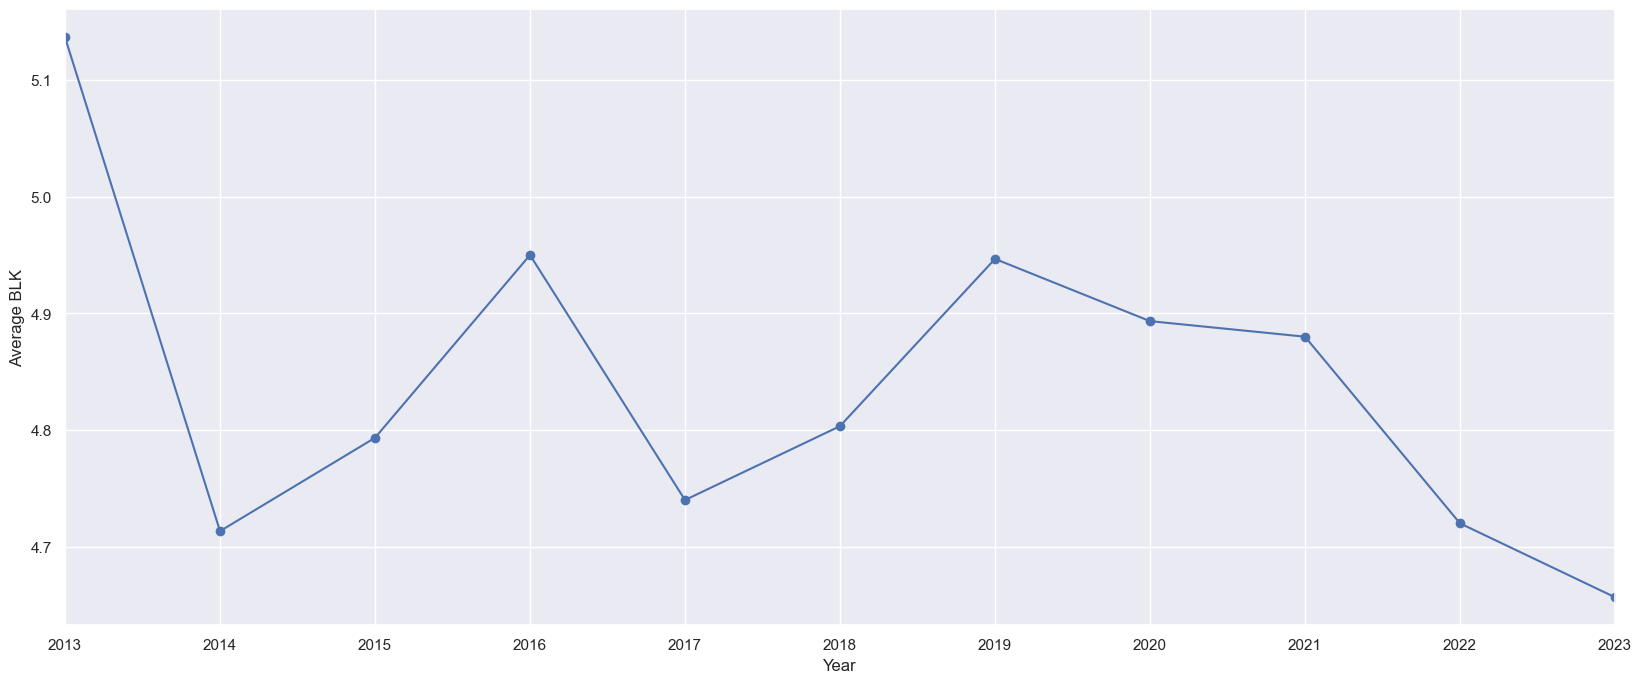

In [43]:
# Time-Series for BLK


# Group by 'Year' and calculate the average BLK
avg = DATA.groupby('Year')['BLK'].mean()

# Plot the time series
plt.figure(figsize=(20, 8))
avg.plot(marker='o', linestyle='-')
plt.ylabel('Average BLK')


#This is just to include the first and last year as there was some error before
years = range(2013, 2024)  
plt.xticks(avg.index, years)
print()

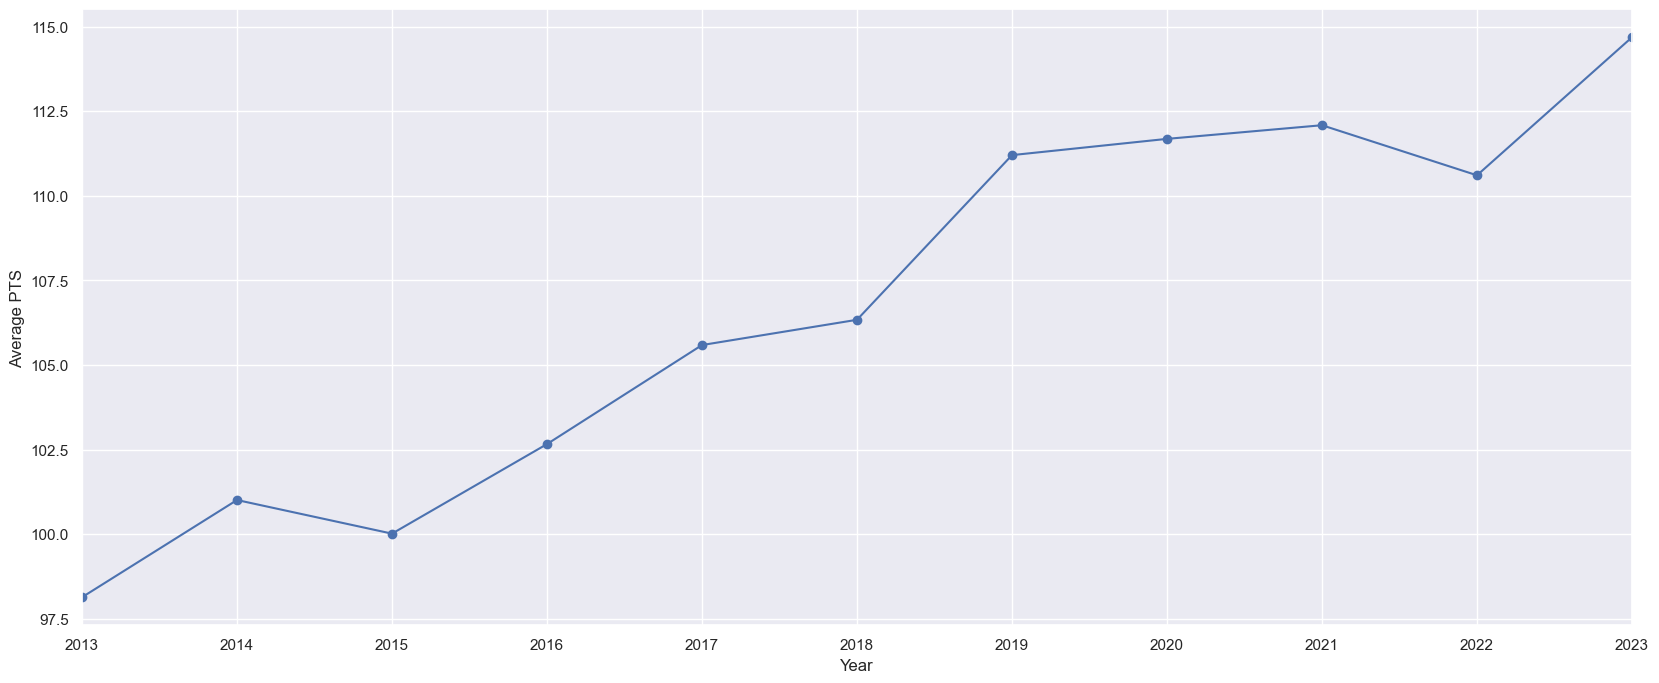

In [44]:
# Time-Series for PTS


# Group by 'Year' and calculate the average PTS
avg = DATA.groupby('Year')['PTS'].mean()

# Plot the time series
plt.figure(figsize=(20, 8))
avg.plot(marker='o', linestyle='-')
plt.ylabel('Average PTS')


#This is just to include the first and last year as there was some error before
years = range(2013, 2024)  
plt.xticks(avg.index, years)
print()

## Analysis of all time-series && Data Driven Insights

As we can see the few time-series that have an upward trend:
FGA, 3PA, AST, PTS

Downward trend:
2PA, BLK, STL

No trend:
FTA

### Upward trend time-series

We can see all these variables, FGA, 3PA, AST, PTS, increasing over the years. We might be able to conclude that as the years progress, the 3-pointer has become very important for a team to win games (and ultimately the championship). All 3 point variables might be useful to determing the NBA champion. 

FGA and PTS has also increased over the years. This might show that teams are moving towards more 'offensive' strategies over 'defensive' ones? Over the years, teams have favour more offensive as seen in the time-series, can this mean their defensive is sacrificed over this? This variables might be useful in determining the NBA champion.

AST has also increased over the years. This shows that team are becoming more team-orientated over the years. Maybe it could mean less 'ISO', isolation plays, over the years and could indicate a useful variable for Champion.

### Downward trend time-series

2PA has greatly decreased over the years. Meaning that more teams have moved away from 2-pointers, and as we know from the above, teams have moved towards 3-pointers, perhaps statistically, it is more efficient to score using the 3-pointer than 2.
This could be a good indicator on whether a teams wins or loses more, hence, also for Champion.

BLK and STL have also decreased over the years. This could mean that teams are less 'defensive' orientated over the years. This actually answer the question above if teams are shifting to becoming more offensive.


### No trend

FTA. We can say that this variable might not be useful in predicting NBA champion.

## Conclusion
We can say that teams are generally moving towards becoming more offense orientated over defense, and especially favouring the 3-point shot over the 2-pointers. Team plays are also in general becoming more prevelant, while defense is less valuable/favoured in todays game compared to the past.

# Machine Learning

Here onwards, we will use different Machine Learning models to try to see if we can predict whether a NBA Team will/is a NBA Champion or not using regular season data. We will train our models and analyse how accurate or good our models are.

## Model 1: Multi-Variate Classification Tree

In [13]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [14]:
DATA.head()

,Rk,Team,Year,MP,WIN%,FGA,FG%,3PA,3P%,2PA,2P%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Champion,Division,MVP
0,17,Atlanta Hawks,2023,242.1,0.500,92.4,0.483,30.5,0.352,61.8,0.548,22.6,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4,0,Southeast Division,0
1,2,Boston Celtics,2023,243.7,0.695,88.8,0.475,42.6,0.377,46.2,0.567,21.6,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,117.9,0,Atlantic Division,0
2,9,Brooklyn Nets,2023,240.6,0.549,85.1,0.487,33.8,0.378,51.3,0.559,22.1,0.800,8.2,32.3,40.5,25.5,7.1,6.2,13.7,21.1,113.4,0,Atlantic Division,0
3,27,Charlotte Hornets,2023,241.8,0.329,90.4,0.457,32.5,0.330,57.9,0.528,23.6,0.749,11.0,33.5,44.5,25.1,7.7,5.2,14.2,20.3,111.0,0,Southeast Division,0
4,19,Chicago Bulls,2023,242.7,0.488,86.8,0.490,28.9,0.361,57.9,0.555,21.8,0.809,8.5,33.9,42.4,24.5,7.9,4.5,13.4,18.9,113.1,0,Central Division,0


In [41]:
# From the above, we know that the variables that are good and have a relationship with Champion are: 
# Rk,MVP,FG%,WIN%,3P%,2P%,AST,BLK,STL,DRB

predictors = ["Rk", "MVP", "FG%", "WIN%","3P%","2P%","AST","BLK","STL","DRB"]

# Extract Response and Predictors
y = pd.DataFrame(DATA["Champion"])
X = pd.DataFrame(DATA[predictors])

# Split the Dataset into Train and Test into 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
                  

In [25]:
#In order to see which depth is the most optimal, we will compare the k-fold cross-validation(k = 5) from depths 1 to 7
i = 1
maxdepth = 7
bestscore = 0

for i in range(1,maxdepth):
    
    # Create and train decision tree classifier
    dtree = DecisionTreeClassifier(max_depth=i)

    # 5-fold cross-validation and its mean
    scores = cross_val_score(dtree, X_train, y_train, cv=5)  
    meanscore = np.mean(scores)
    
    # Update best depth if current depth gives better mean-score
    if (meanscore > bestscore):
           bestdepth = i

# Step 4: Select optimal depth
print(f"Optimal Depth: {bestdepth}")

Optimal Depth: 6


[Text(0.5909090909090909, 0.9285714285714286, 'FG% <= 0.494\ngini = 0.059\nsamples = 231\nvalue = [224, 7]\nclass = Non-Champion'),
 Text(0.36363636363636365, 0.7857142857142857, '3P% <= 0.388\ngini = 0.035\nsamples = 227\nvalue = [223, 4]\nclass = Non-Champion'),
 Text(0.18181818181818182, 0.6428571428571429, 'WIN% <= 0.689\ngini = 0.018\nsamples = 219\nvalue = [217, 2]\nclass = Non-Champion'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 203\nvalue = [203, 0]\nclass = Non-Champion'),
 Text(0.2727272727272727, 0.5, 'BLK <= 4.1\ngini = 0.219\nsamples = 16\nvalue = [14, 2]\nclass = Non-Champion'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Champion'),
 Text(0.36363636363636365, 0.35714285714285715, 'FG% <= 0.475\ngini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = Non-Champion'),
 Text(0.2727272727272727, 0.21428571428571427, 'BLK <= 5.15\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Non-Champion'),
 Text(0.181818181

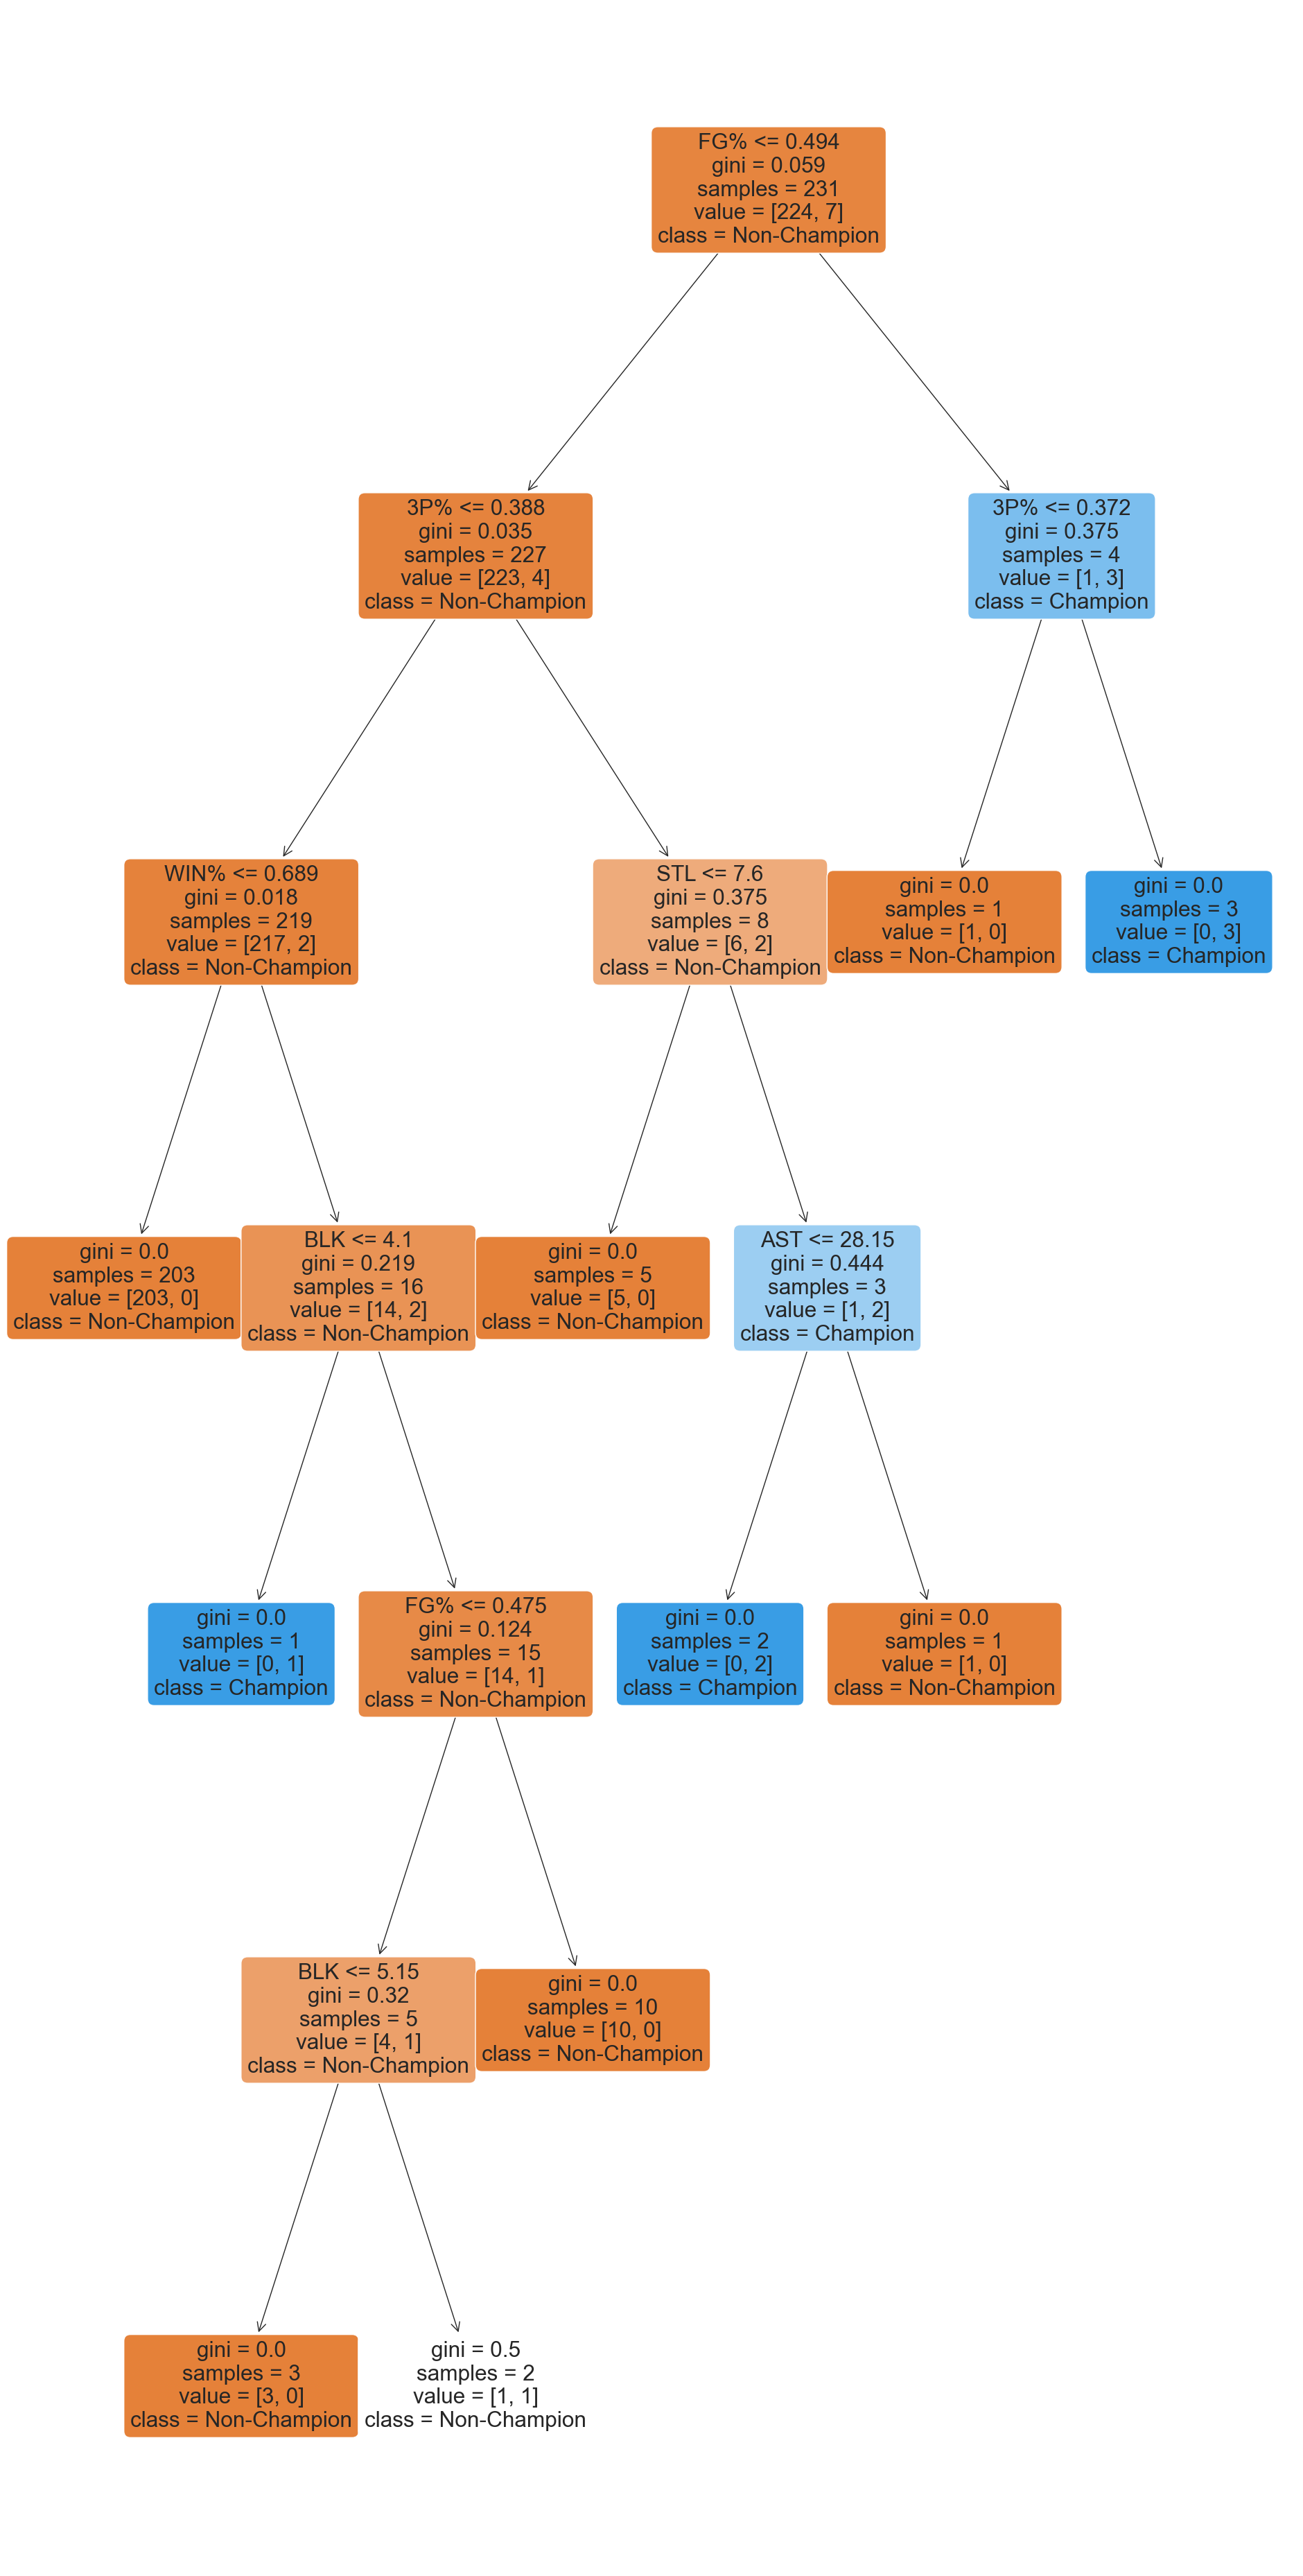

In [42]:
# From the above we can see the optimal depth is 6

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6)  # create the decision tree object using depth of 6
dectree.fit(X_train, y_train)                    # train the decision tree model

#Print Tree
f = plt.figure(figsize=(24,48))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["Non-Champion","Champion"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9956709956709957

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9595959595959596



<Axes: >

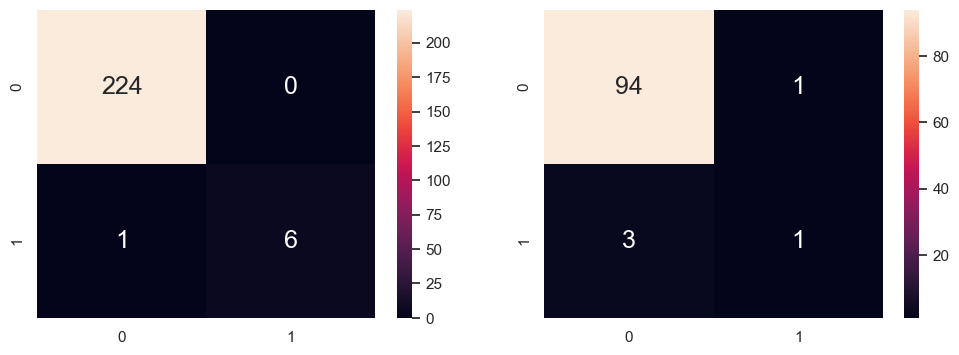

In [43]:
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [44]:
# Obtain True/False Negative/Positve
matrix = confusion_matrix(y_test, y_test_pred)
TN = matrix[0][0] 
FP = matrix[0][1] 
FN = matrix[1][0] 
TP = matrix[1][1] 

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(TN+FP)
FNR = FN/(FN+TP)

print("True Positive Rate :  ", TPR)
print("True Negative Rate :  ", TNR)
print("False Positive Rate :  ", FPR)
print("False Negative Rate :  ", FNR)



True Positive Rate :   0.25
True Negative Rate :   0.9894736842105263
False Positive Rate :   0.010526315789473684
False Negative Rate :   0.75


### Analysis
We can evidently see that the Classification accuracy is very high, infact hovering above 0.9 on the test dataset. But we need to analyse further, hence we find the True/False Positive/Negative rates for the model on the Test dataset. From the above we can see that, the True Positive rate is around 0.25, which is very low and not optimal. This indicates that our model is correctly identifying only 25% of the positive instances in the test dataset. On the other hand, the False Negative Rate is too high at around 0.75, this means that the model is failing to detect a significant portion, 75%, of the positive instances. This means that the model might not be very accurate in prediciting whether a team will be/is a NBA Champion, hence we need to do more.

With that being said, we realise that the original data which is 319 Non-champions to 11 Champions is too imbalanced. As a result, simply using a multi-variate classification tree would result in us obtaining a High false Negative rate, hence low true Positive rate, due to the imbalance as seen above.

Hence as a result, for the 2 other models we will be using, we will need to employ techniques that can balance our current data imbalance or try to reduce its negative effect on our models.

## Model 2: Random Forest 

In [52]:
# Import essential models and functions from sklearn
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [53]:
DATA.head()

,Rk,Team,Year,MP,WIN%,FGA,FG%,3PA,3P%,2PA,2P%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Champion,Division,MVP
0,17,Atlanta Hawks,2023-01-01,242.1,0.500,92.4,0.483,30.5,0.352,61.8,0.548,22.6,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4,0,Southeast Division,0
1,2,Boston Celtics,2023-01-01,243.7,0.695,88.8,0.475,42.6,0.377,46.2,0.567,21.6,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,117.9,0,Atlantic Division,0
2,9,Brooklyn Nets,2023-01-01,240.6,0.549,85.1,0.487,33.8,0.378,51.3,0.559,22.1,0.800,8.2,32.3,40.5,25.5,7.1,6.2,13.7,21.1,113.4,0,Atlantic Division,0
3,27,Charlotte Hornets,2023-01-01,241.8,0.329,90.4,0.457,32.5,0.330,57.9,0.528,23.6,0.749,11.0,33.5,44.5,25.1,7.7,5.2,14.2,20.3,111.0,0,Southeast Division,0
4,19,Chicago Bulls,2023-01-01,242.7,0.488,86.8,0.490,28.9,0.361,57.9,0.555,21.8,0.809,8.5,33.9,42.4,24.5,7.9,4.5,13.4,18.9,113.1,0,Central Division,0


In [54]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 0 to 340
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Rk        330 non-null    int64         
 1   Team      330 non-null    object        
 2   Year      330 non-null    datetime64[ns]
 3   MP        330 non-null    float64       
 4   WIN%      330 non-null    float64       
 5   FGA       330 non-null    float64       
 6   FG%       330 non-null    float64       
 7   3PA       330 non-null    float64       
 8   3P%       330 non-null    float64       
 9   2PA       330 non-null    float64       
 10  2P%       330 non-null    float64       
 11  FTA       330 non-null    float64       
 12  FT%       330 non-null    float64       
 13  ORB       330 non-null    float64       
 14  DRB       330 non-null    float64       
 15  TRB       330 non-null    float64       
 16  AST       330 non-null    float64       
 17  STL       330 non-nul

### Resampling 

In order to adjust the original data such that the number of Champions and non-Champions are not skewed, we will explore the 2 ways of resampling the data: upsampling and downsampling. 

In [55]:
# Extract only the variables that we need (excluded Team, Year & Division)
DATA_RS = DATA.drop(['Team','Year','Division'], axis = 1)

/Users/xuehao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


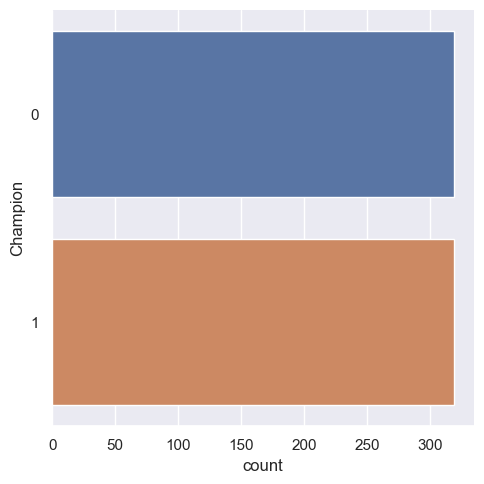

In [56]:
# Separate the Champions and the non-Champions
DATAchamp = DATA_RS[DATA_RS.Champion == 1]
DATAnochamp = DATA_RS[DATA_RS.Champion == 0]
 
# Upsample the Champion samples
DATAchamp_up = resample(DATAchamp, 
                        replace=True,                      # sample with replacement
                        n_samples=DATAnochamp.shape[0])    # to match number of Non-Champions
 
# Combine the two classes back after upsampling
DATA_up = pd.concat([DATAnochamp, DATAchamp_up])
 
# Check the ratio of the classes
DATA_up['Champion'].value_counts()

# Quick plot to check the balanced classes visually
sb.catplot(y = 'Champion', data = DATA_up, kind = "count")

/Users/xuehao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


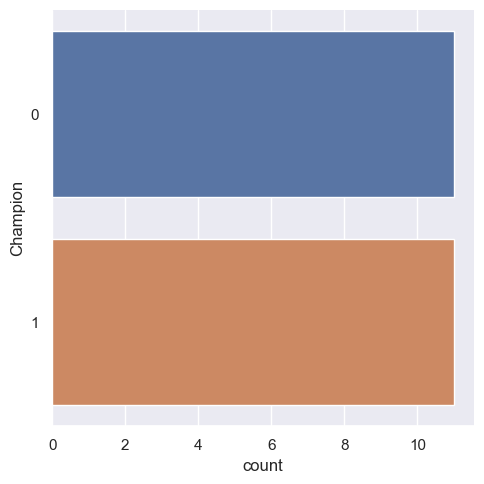

In [57]:
# Downsampling the number of non-Champions to match the number of Champions
 
# Downsample the Non-Champions
DATAnochamp_down = resample(DATAnochamp, 
                            replace=False,              # sample without replacement
                            n_samples=len(DATAchamp),   # to match number of Champions
                            random_state=42)            # random selection
 
# Combine the two classes back after upsampling
DATA_down = pd.concat([DATAnochamp_down, DATAchamp])
 
# Check the ratio of the classes
DATA_down['Champion'].value_counts()

# Quick plot to check the balanced classes visually
sb.catplot(y = 'Champion', data = DATA_down, kind = "count")

### Random Forest Model on Upsampled Data 

In [57]:
# Extract Response and Predictors
y = pd.DataFrame(DATA_up['Champion'])
X = pd.DataFrame(DATA_up.drop(['Champion'], axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [58]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 4)        # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Champion.ravel())

RandomForestClassifier(max_depth=4, n_estimators=1000)

In [60]:
# Get feature importances 
feature_importances = pd.Series(rforest.feature_importances_, index=X.columns) 
 
# Sort feature importances in descending order 
sorted_feature_importances = feature_importances.sort_values(ascending=False) 
 
# Print the top n most important variables 
n = 5
print(sorted_feature_importances.head(n))

WIN%    0.242806
Rk      0.213070
FG%     0.112286
AST     0.078121
2P%     0.060992
dtype: float64


Train Data
Accuracy  :	 0.9932735426008968

TPR Train :	 1.0
TNR Train :	 0.986784140969163

FPR Train :	 0.013215859030837005
FNR Train :	 0.0


<Axes: >

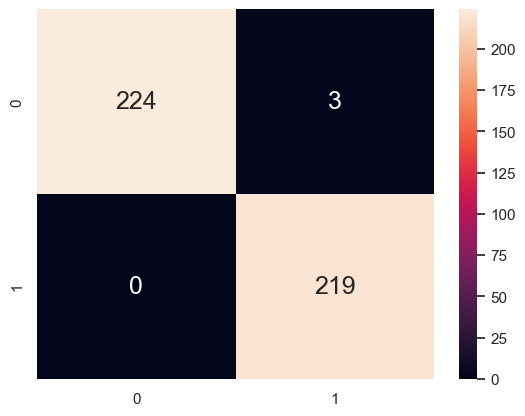

In [61]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9791666666666666

TPR Test :	 1.0
TNR Test :	 0.9565217391304348

FPR Test :	 0.043478260869565216
FNR Test :	 0.0


<Axes: >

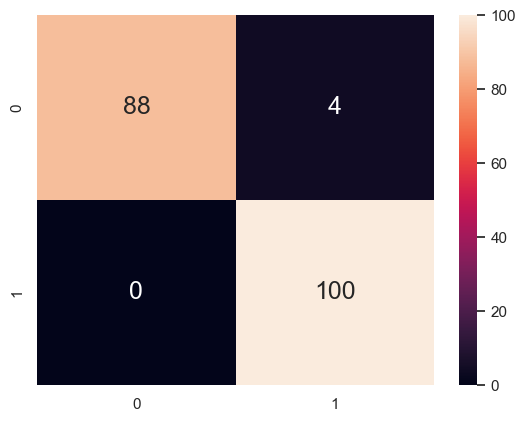

In [62]:
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Analysis
The overall accuracy of the model on the test set is approximately 98%, which indicates that the majority of predictions made by the model are correct.

From the above model, we can see that the True Positive Rate and False Negative Rate of the model on the test set is 1.0 and 0.0 respectively. This shows that the model is able to correctly identify all 100 of the actual Champions. 

On the other hand, the True Negative Rate and False Positive Rate of the model on the test data set is approximately 0.9565 and 0.0435 respectively. Although it is not as accurate as compared to predict the actual Champions, the model is still highly accurate in predicting the actual Non-Champions, identifying 96% of the actual Non-Champions correctly. 

Lastly, the model is able to identify the top 5 most important variables when predicting whether a team is a Champion. 

WIN%    0.242806

Rk      0.213070

FG%     0.112286

AST     0.078121

2P%     0.060992

This shows that these 5 variables are the most important variables that influences a team's Championship probability based on this model, with a team's win percentage being the most influential variable. 

Overall, the above analysis indicates that the random forest model trained on upsampled data performs exceptionally well in identifying both Champions and Non-Champions. It demonstrates high accuracy, particularly in recognizing actual Champions, while also maintaining a strong ability to correctly classify Non-Champions.

### Random Forest model on Downsampled Data

In [63]:
# Extract Response and Predictors
y = pd.DataFrame(DATA_down['Champion'])
X = pd.DataFrame(DATA_down.drop(['Champion'], axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [64]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 4)        # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Champion.ravel())

RandomForestClassifier(max_depth=4, n_estimators=1000)

In [65]:
# Get feature importances 
feature_importances = pd.Series(rforest.feature_importances_, index=X.columns) 
 
# Sort feature importances in descending order 
sorted_feature_importances = feature_importances.sort_values(ascending=False) 
 
# Print the top n most important variables 
n = 5  # Change this value according to your preference 
print(sorted_feature_importances.head(n))

WIN%    0.197609
Rk      0.193465
FG%     0.106884
DRB     0.070316
3P%     0.062216
dtype: float64


Train Data
Accuracy  :	 1.0

TPR Train :	 1.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0


<Axes: >

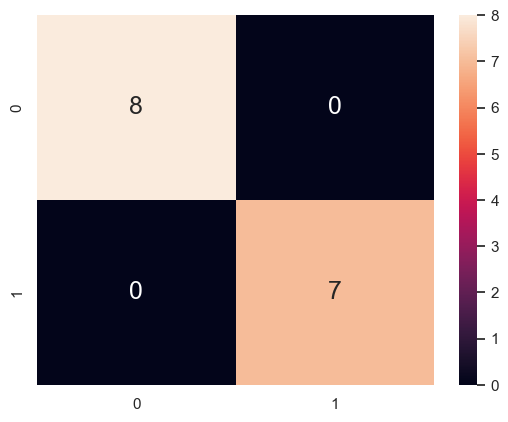

In [66]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8571428571428571

TPR Test :	 1.0
TNR Test :	 0.6666666666666666

FPR Test :	 0.3333333333333333
FNR Test :	 0.0


<Axes: >

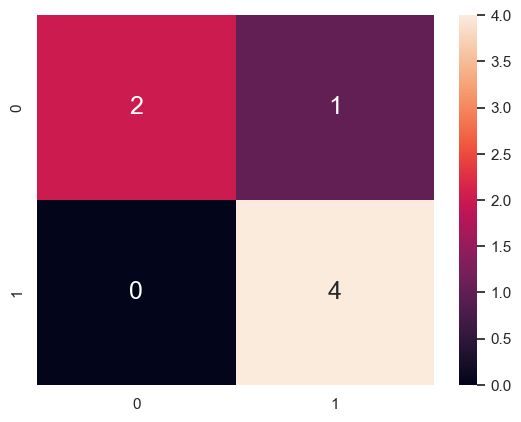

In [67]:
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Analysis
The overall accuracy of the model on the test set is approximately 85.7%, which indicates that the majority of predictions made by the model are correct.

From the above model, we can see that the True Positive Rate and False Negative Rate of the model on the test set is 1.0 and 0.0 respectively. This shows that the model is able to correctly identify all 4 of the actual Champions. 

On the other hand, the True Negative Rate and False Positive Rate of the model on the test data set is approximately 0.66 and 0.33 respectively. It is clearly not as accurate in predicting the Non-Champions, identifying only two out of 3 Non-Champion teams correctly. 

Lastly, the model is able to identify the top 5 most important variables when predicting whether a team is a Champion. 

WIN%    0.197609

Rk      0.193465

FG%     0.106884

DRB     0.070316

3P%     0.062216

This shows that these 5 variables are the most important variables that influences a team's Championship probability based on this model, with a team's win percentage and rank being the top 2 most influential variables. 

Overall, while the model trained on downsampled data demonstrates strong performance in identifying Champions, its accuracy in predicting Non-Champions is notably lower. The relatively high false positive rate suggests that the model may require further refinement, possibly through the use of larger datasets as it is currently limited by the small data size. 

## Overall

#### Random Forest Classification Model on Upsampled Data vs Downsampled Data
Comparing the accuracy of the model when used on upsampled data and the accuracy when used on downsampled data, it can be seen that using the model on upsampled data can yield a higher prediction accuracy of 0.983475 as comapared to 0.8571428571428571 when used on downsampled data. Judging from the prediction accuracy alone, it is clear that using the Random Forest Classification Model on Upsampled Data is better than using it on Downsampled Data. 

However, the upsampled data are random duplicates of the original NBA teams that won championships. Using upsampled data may introduce unwanted bias and noise to the dataset. On the other hand, downsampling preserves the original distribution of the data and can result in a more interpretable model, comparatively more reliable as compared to the upsampled data. It is important to note that the accuracy of the model used on downsampled data is not much lower than the model used on upsampled data. Hence, it is more logical to choose the downsampled data to perform Random Forest Classification on. 

#### Random Forest Classification Model vs Multi-Variate Classification Tree 
It can be seen that the Random Forest model has a lower accuracy of 0.8571428571428571 in predicting championship teams as compared to the previous Multi-Variate Classification Tree model of an accuracy of 0.9292929292929293. However, the Random Forest model is has a significantly lower false negative rate of 0.33 as compared to the previous model's false positive rate of 0.80a Hence, the Random Forest model is more accurate in predicting reliable results. 

## MODEL 3: Cost-Sensitive Support Vector Machine (SVM)

In [27]:
#Import Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import pandas as pd
import numpy as np


In [13]:
DATA.head()

,Rk,Team,Year,MP,WIN%,FGA,FG%,3PA,3P%,2PA,2P%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Champion,Division,MVP
0,17,Atlanta Hawks,2023,242.1,0.500,92.4,0.483,30.5,0.352,61.8,0.548,22.6,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4,0,Southeast Division,0
1,2,Boston Celtics,2023,243.7,0.695,88.8,0.475,42.6,0.377,46.2,0.567,21.6,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,117.9,0,Atlantic Division,0
2,9,Brooklyn Nets,2023,240.6,0.549,85.1,0.487,33.8,0.378,51.3,0.559,22.1,0.800,8.2,32.3,40.5,25.5,7.1,6.2,13.7,21.1,113.4,0,Atlantic Division,0
3,27,Charlotte Hornets,2023,241.8,0.329,90.4,0.457,32.5,0.330,57.9,0.528,23.6,0.749,11.0,33.5,44.5,25.1,7.7,5.2,14.2,20.3,111.0,0,Southeast Division,0
4,19,Chicago Bulls,2023,242.7,0.488,86.8,0.490,28.9,0.361,57.9,0.555,21.8,0.809,8.5,33.9,42.4,24.5,7.9,4.5,13.4,18.9,113.1,0,Central Division,0


## Using Cost-Sensitive SVM

In [61]:
#Copy of DATA
df = DATA

selected_features = ["Rk", "MVP", "FG%", "WIN%","3P%","2P%","AST","BLK","STL","DRB"]
X = df[selected_features]
y = df['Champion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


# This ensures that all features are on the same scale and prevents the features with larger scales 
#from dominating those with smaller scales during model training (good for SVM)
scaler = StandardScaler()
scaler.fit(X_train)  # Fit scaler on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Here, we are setting the weight for class 1, which is Champions, to be 10 times higher than the weight for class 0, Non-Champions
cost_weights = {0: 1, 1: 29}
#The above is to make our SVM more cost-sensitive, infact we made 'Champions' "29 times heavier" to make our SVM more optimal

# Train the Cost-Sensitive SVM Model using the kernel=poly and class_weight = cost_weights
model = SVC(kernel='poly', class_weight=cost_weights)
model.fit(X_train_scaled, y_train)

SVC(class_weight={0: 1, 1: 29}, kernel='poly')

In [107]:
y_pred = model.predict(X_test_scaled)

# Generate the classification report 
report = classification_report(y_test, y_pred)
print("Classification Report for weighted Data:\n", report)

Classification Report for weighted Data:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        82
           1       0.33      1.00      0.50         1

    accuracy                           0.98        83
   macro avg       0.67      0.99      0.74        83
weighted avg       0.99      0.98      0.98        83



## Analysis

The overall accuracy of the model on the test set is approximately 98%, which indicates that the majority of predictions made by the model are correct.

For class 0 (Non-Champions), the precision is 1.00 and the recall is 0.98. This means that among the instances predicted as Non-Champions, 100% are actually Non-Champions, and the model correctly identifies 98% of the actual Non-Champions.

For class 1 (Champions), the recall is 1.00. This indicates that the model correctly identifies ALL 100% of the actual Champions.

The weighted average F1-score, which takes into account the class imbalance, is approximately 0.98. This score reflects the balance between precision and recall, indicating that the model performs very well in terms of both minimizing false positives and false negatives.

In conclusion, the model demonstrates strong performance in accurately classifying instances of both classes, especially when considering the class imbalance. The high F1-score and accuracy indicate that the model is effective in distinguishing between Champions and Non-Champions. 

### Visualization and Importance

**TO NOTE: THE BELOW IS JUST TO SHOW A SIMPLIFIED VISUALIZATION OF A REDUCED MODEL.**

The below codes shows the top 2 variables that are most important for our model.

And to give a visual representation of our model, we are going to be basing of only those 2 variables to give a rough idea and visualization. (As trying to use all 10 variables will result in a 10-Dimensional plot which in our case is impossible to plot properly without diving into very complex theory)

In [19]:
#Code to GET top 2 features:

# Get the indices of support vectors
support_vector_indices = model.support_

# Get the support vectors
support_vectors = X_train_scaled[support_vector_indices]

# Calculate the importance of features based on the magnitude of support vectors
feature_importance = np.abs(support_vectors).mean(axis=0)

# Get the indices of top 2 features
top2_indices = np.argsort(feature_importance)[-2:]

# Map indices to feature names
top2_features = [selected_features[i] for i in top2_indices]

print("Top 2 features:", top2_features)

Top 2 features: ['WIN%', 'Rk']


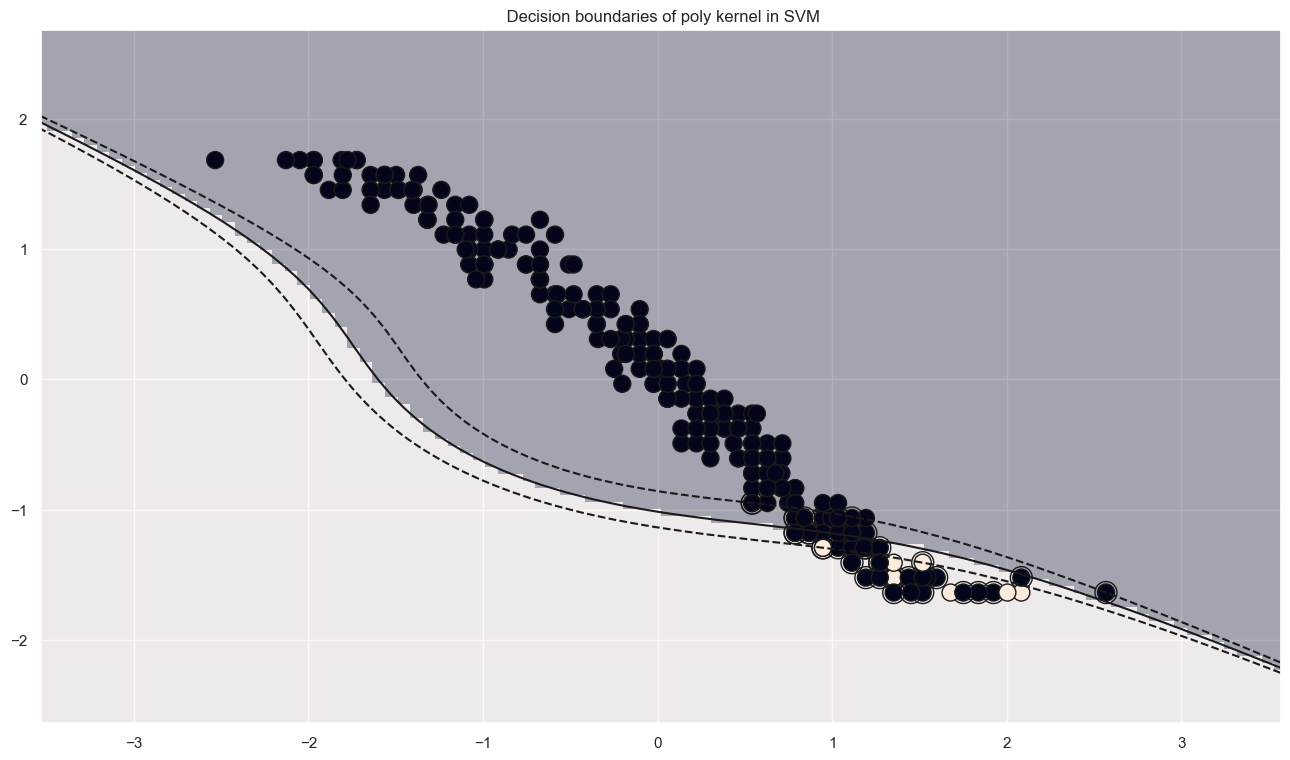

In [61]:
# Here we need to create a NEW X that only has those 2 variables as above:

# Reduce X to only the top 2 features
X_reduced = X_train_scaled[:, top2_indices]

# Train the SVC
model2 = SVC(kernel='poly', class_weight=cost_weights,gamma=2).fit(X_reduced, y_train)

# Settings for plotting
_, ax = plt.subplots(figsize=(16, 9))
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot decision boundary and margins
common_params = {"estimator": model2, "X": X_reduced, "ax": ax}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="pcolormesh",
    alpha=0.3,
)
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=[-1, 0, 1],
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
)

# Plot bigger circles around samples that serve as support vectors
ax.scatter(
    model2.support_vectors_[:, 0],
    model2.support_vectors_[:, 1],
    s=250,
    facecolors="none",
    edgecolors="k",
)
# Plot samples by color and add legend

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, s=150, edgecolors="k")

ax.set_title(" Decision boundaries of poly kernel in SVM")

_ = plt.show()

As said earlier, this is a SIMPLE visualization of our SVM model with kernel = poly. This model is a REDUCED version of our original model as it only has two variables, which are obtained above. 

This is to show how SVM does classification using our TRAIN data. The black circles are Non-Champions and the white circles are Champions. The polynomial curve shows the classification done by our model to try to classify the circles(teams) into Champions or Non-champions.(On the TEST data of course)

## Up Sampling

In [28]:
# This whole section of code is to upsample our current data, specifically, the number of champions

# Separate champions and non-champions
champions = DATA[DATA['Champion'] == 1]
non_champions = DATA[DATA['Champion'] == 0]

#Basically all non-champions
non_champions_upsampled = non_champions

# Upsample the champions to equal the non-champions
champions_upsampled = champions.sample(n=319, replace=True)

# Combine champions and non-champions
df_upsampled = pd.concat([champions_upsampled, non_champions_upsampled])


In [29]:
# Reprocess the Data
X_upsampled = df_upsampled.drop(['Team','Champion','MP','FGA','Year','3PA','2PA','FTA','Division','PTS'], axis=1)
y_upsampled = df_upsampled['Champion']

X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_upsampled, y_upsampled, test_size=0.25, random_state=42)

scaler_us = StandardScaler()
X_train_scaled_us = scaler_us.fit_transform(X_train_us)
X_test_scaled_us = scaler_us.transform(X_test_us)

# Train the Cost-Sensitive SVM Model on upsampled data
model_us = SVC(kernel='poly', class_weight='balanced', random_state=42)
model_us.fit(X_train_scaled_us, y_train_us)

SVC(class_weight='balanced', kernel='poly', random_state=42)

In [30]:
y_pred_us = model_us.predict(X_test_scaled_us)

# Generate the classification report for upsampled data
report_us = classification_report(y_test_us, y_pred_us)

# Print the classification report for upsampled data
print("Classification Report for Upsampled Data:\n", report_us)

Classification Report for Upsampled Data:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        81
           1       0.93      1.00      0.96        79

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.97      0.96      0.96       160



## Analysis 

The overall accuracy of the model on the test set is approximately 96%, which indicates that the majority of predictions made by the model are correct.

For class 0 (Non-Champions), the precision is 1.00 and the recall is 0.93. This means that among the instances predicted as Non-Champions, 100% are actually Non-Champions, and the model correctly identifies 93% of the actual Non-Champions.

For class 1 (Champions), the precision is 0.93 and the recall is 1.00. This indicates that among the instances predicted as Champions, 93% are actually Champions, and the model correctly identifies 100% of the actual Champions.

The weighted average F1-score, which takes into account the class imbalance, is approximately 0.96. This score reflects the balance between precision and recall, indicating that the model performs well in terms of both minimizing false positives and false negatives.

In conclusion, the model demonstrates strong performance in accurately classifying instances of both classes, especially when considering the class imbalance. The high F1-score and accuracy indicate that the model is effective in distinguishing between Champions and Non-Champions.

Comparing with the model above using cost_weights, this model is might be even better as it has better precision, recall and f1-score for class1(Champions)

## Down Sampling

Here we down randomly sample our DATA into 12 Non-champions and 11 Champions. This is to help alleviate the issue of our imbalance in DATA as mentioned earlier.

In [125]:
# Separate champions and non-champions
champions = DATA[DATA['Champion'] == 1]
non_champions = DATA[DATA['Champion'] == 0]

# Downsample non-champions
non_champions_downsampled = non_champions.sample(n=12)

# Randomly select 11 champions, which is all the champions
champions_downsampled = champions

# Combine champions and non-champions
df_downsampled = pd.concat([champions_downsampled, non_champions_downsampled])

In [135]:
# Reprocess the Data
X_downsampled = df_downsampled.drop(['Team','Champion','MP','FGA','Year','3PA','2PA','FTA','Division','PTS'], axis=1)
y_downsampled = df_downsampled['Champion']

X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X_downsampled, y_downsampled, test_size=0.25)

# This ensures that all features are on the same scale and prevents the features with larger scales 
#from dominating those with smaller scales during model training (good for SVM)
scaler_ds = StandardScaler()
X_train_scaled_ds = scaler_ds.fit_transform(X_train_ds)
X_test_scaled_ds = scaler_ds.transform(X_test_ds)

# Train the Cost-Sensitive SVM Model on downsampled data
model_ds = SVC(kernel='poly', class_weight='balanced', random_state=42)
model_ds.fit(X_train_scaled_ds, y_train_ds)


SVC(class_weight='balanced', kernel='poly', random_state=42)

In [129]:
y_pred_ds = model_ds.predict(X_test_scaled_ds)
# Generate the classification report for downsampled data
report_ds = classification_report(y_test_ds, y_pred_ds)

# Print the classification report for downsampled data
print("Classification Report for Downsampled Data:\n", report_ds)

Classification Report for Downsampled Data:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.67      0.50      0.57         4

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.56      0.50      0.51         6



##### Analysis 

The overall accuracy of the model on the test set is approximately 50%, which indicates that only half of predictions made by the model are correct.

For class 0 (Non-Champions), the precision is 0.33 and the recall is 0.50. This means that among the instances predicted as Non-Champions, 33% are actually Non-Champions, and the model only correctly identifies 50% of the actual Non-Champions.

For class 1 (Champions), the precision is 0.67 and the recall is 0.50. This indicates that among the instances predicted as Champions, 67% are actually Champions, and the model correctly identifies 50% of the actual Champions.

The weighted average F1-score, which takes into account the class imbalance, is approximately 0.51. This score reflects the balance between precision and recall, indicating that the model performs not that great in terms of both minimizing false positives and false negatives.

In conclusion, the model demonstrates mediocore to poor performance in accurately classifying instances of both classes, especially when considering the class imbalance. The F1-score and accuracy indicate that the model is not very effective in distinguishing between Champions and Non-Champions.

Comparing with the models above, this models performs the poorest.

### Visualization and Importance

**TO NOTE: THE BELOW IS JUST TO SHOW A SIMPLIFIED VISUALIZATION OF A REDUCED MODEL.**

The below codes shows the top 2 variables that are most important for our model.

And to give a visual representation of our model, we are going to be basing of only those 2 variables to give a rough idea and visualization. (As trying to use all 10 variables will result in a 10-Dimensional plot which in our case is impossible to plot properly without diving into very complex theory)

In [130]:
#Code to GET top 2 features:

# Get the indices of support vectors
support_vector_indices = model_ds.support_

# Get the support vectors
support_vectors = X_train_scaled[support_vector_indices]

# Calculate the importance of features based on the magnitude of support vectors
feature_importance = np.abs(support_vectors).mean(axis=0)

# Get the indices of top 2 features
top2_indices = np.argsort(feature_importance)[-2:]

# Map indices to feature names
top2_features = [selected_features[i] for i in top2_indices]

print("Top 2 features:", top2_features)

Top 2 features: ['2P%', 'DRB']


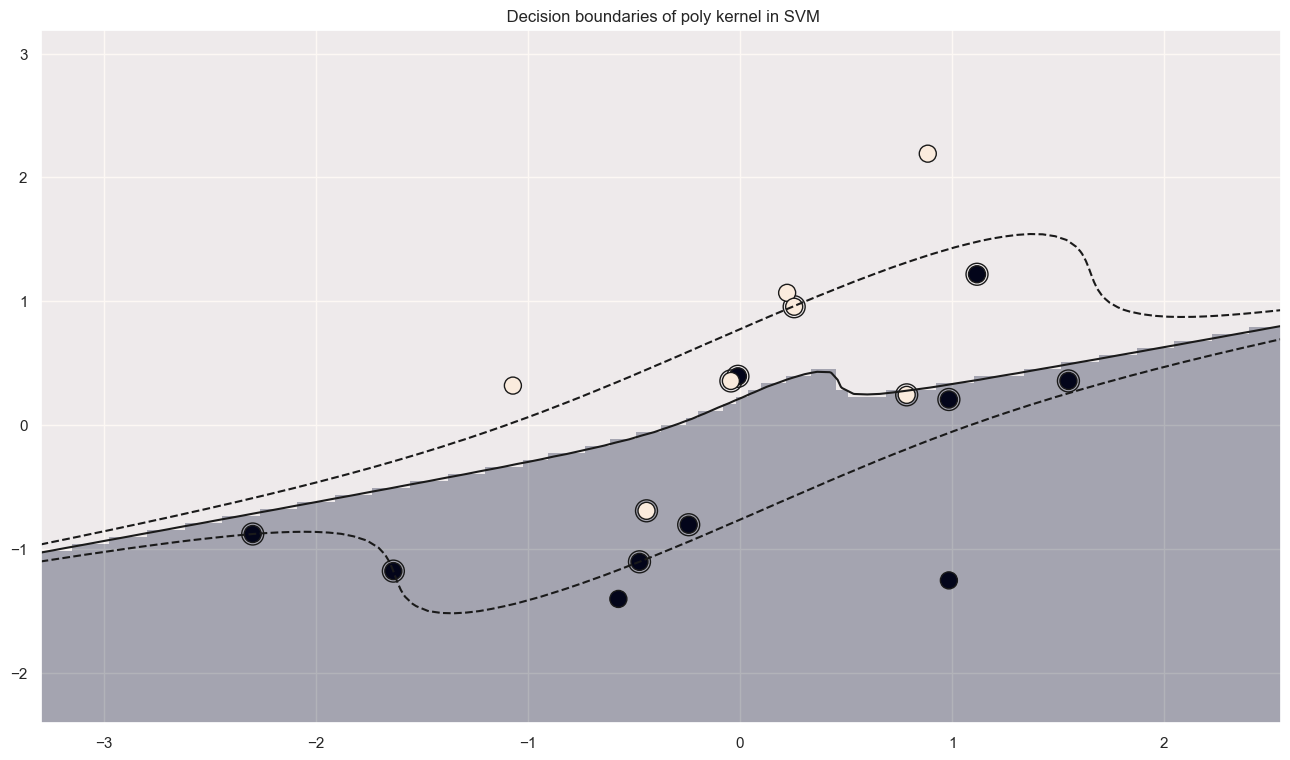

In [131]:
# Here we need to create a NEW X that only has those 2 variables as above:

# Reduce X to only the top 2 features
X_reduced = X_train_scaled_ds[:, top2_indices]

# Train the SVC
model2 = SVC(kernel='poly', class_weight='balanced',gamma=2).fit(X_reduced, y_train_ds)

# Settings for plotting
_, ax = plt.subplots(figsize=(16, 9))
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot decision boundary and margins
common_params = {"estimator": model2, "X": X_reduced, "ax": ax}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="pcolormesh",
    alpha=0.3,
)
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=[-1, 0, 1],
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
)

# Plot bigger circles around samples that serve as support vectors
ax.scatter(
    model2.support_vectors_[:, 0],
    model2.support_vectors_[:, 1],
    s=250,
    facecolors="none",
    edgecolors="k",
)
# Plot samples by color and add legend
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train_ds, s=150, edgecolors="k")
ax.set_title(" Decision boundaries of poly kernel in SVM")

_ = plt.show()

### Perhaps,

By looking at this plot, perhaps when we down sample, it might be better to use lesser variables to predict Champions as the plot, from a visual perspective, seem to perform better than our original model using all 10 features.

## Overall
Obviously the model where we down-sampled our data performed the poorest. While the first model with cost_weights attached and the model where we up-sampled our data perform quite similarily and both performed excellently.

The model trained on the up-sampled data, which artificially increased the number of instances in the minority class, performed similarly to the model with class weights attached. However, the reliance on up-sampling to address class imbalance may introduce biases into the model and may not be the most robust approach for predicting NBA Champions for the current season.

In conclusion, based on our SVM machine learning experiments, we believe that the model trained on the original dataset with class weights attached is the most suitable for predicting NBA Champions. This model effectively balances predictive performance with considerations for class imbalance, resulting in reliable predictions for the outcome of the NBA season.

# Machine Learning Conclusion, Data Driven Insights & Recommendations

After working with 3 different types of Machine Learning models (Multi-variate Classification Tree, Random Forrest & Support Vector Machine), we come to the conclusion that our Cost-Sensitive Support Vector Machine is arguably the best model in predicting NBA Champion. Not only it has the highest prediction accuracy out of all 3 ML models, but it deals with the class imbalance very well.

It is able to predict all 100% of Champions correct and 98% of Non-champions correctly as well, indicating an extremely high True Positive/Negative rates and so extremely low False Positive/Negative rates. 

On top of that, if we are considering the number of parameters used by each models (excluding Multi-variate Classification Tree as that model performed extremely poorly), both random forest and SVM has 6 parameters each. This means that even with the same number of parameters, SVM still have a better performance and so SVM is truly the best model out of the 3.

What we would recommend is to use our SVM model to predict NBA Champion.

Additionally, we can see that the variable WIN% is constantly rank top 2 in the importance of variable to the models for ALL 3 MODELS, this probably means that WIN% is the most important factor in determining which team becomes/is an NBA Champion.
Hence what we would recommend is for teams to recruit more players with higher WIN%. To go further, teams can look into WIN SHARES as well, to see how much said player contributes to the WINS of their teams.

## Additionally, 
let us test using the 2011 NBA Champion, Dallas Mavericks. Here are the Dalla Mavericks important Regular Season stats to use for our model: Rk: 5 , MVP: No(0) , FG%: 0.475 , WIN%: 0.695 , 3P%: 0.365 , 2P%: 0.516 , AST: 23.8 , BLK: 4.3 , STL: 6.8 , DRB: 31.9


In [68]:
X_2011 = [5, 0, 0.475, 0.695, 0.365, 0.516, 23.8, 4.3, 6.8, 31.9]
X_2011 = np.array(X_2011).reshape(1, -1)

y_2011 = model.predict(X_2011)
print("Champion: ",y_2011)


Champion:  [1]


C:\Users\Place\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Wonderfully, this shows that our SVM model is able to correctly predict the 2011 NBA Champions Dallas Mavericks!

What about a non-champion team? How about the Knicks in the same year?
Rk: 14 , MVP: No(0) , FG%: 0.457 , WIN%: 0.512 , 3P%: 0.368 , 2P%: 0.496 , AST: 21.4 , BLK: 5.8 , STL: 7.6 , DRB: 30.1

In [69]:
X_2011 = [14, 0, 0.457, 0.512, 0.368, 0.496, 21.4, 5.8, 7.6, 30.1]
X_2011 = np.array(X_2011).reshape(1, -1)

y_2011 = model.predict(X_2011)
print("Champion: ",y_2011)

Champion:  [0]


C:\Users\Place\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Great, seems like our model is able to predict Non-Champion correctly as well.